In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import matplotlib

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Sample Collection

In [2]:
geo_loc = pd.read_csv('olist_geolocation_dataset.csv')
order_item = pd.read_csv('olist_order_items_dataset.csv')
inventory = pd.read_csv('olist_products_dataset.csv')
translate = pd.read_csv('product_category_name_translation.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')
order_info = pd.read_csv('olist_orders_dataset.csv')
seller_info = pd.read_csv('olist_sellers_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')

# Data Exploration

<AxesSubplot:title={'center':'South America'}>

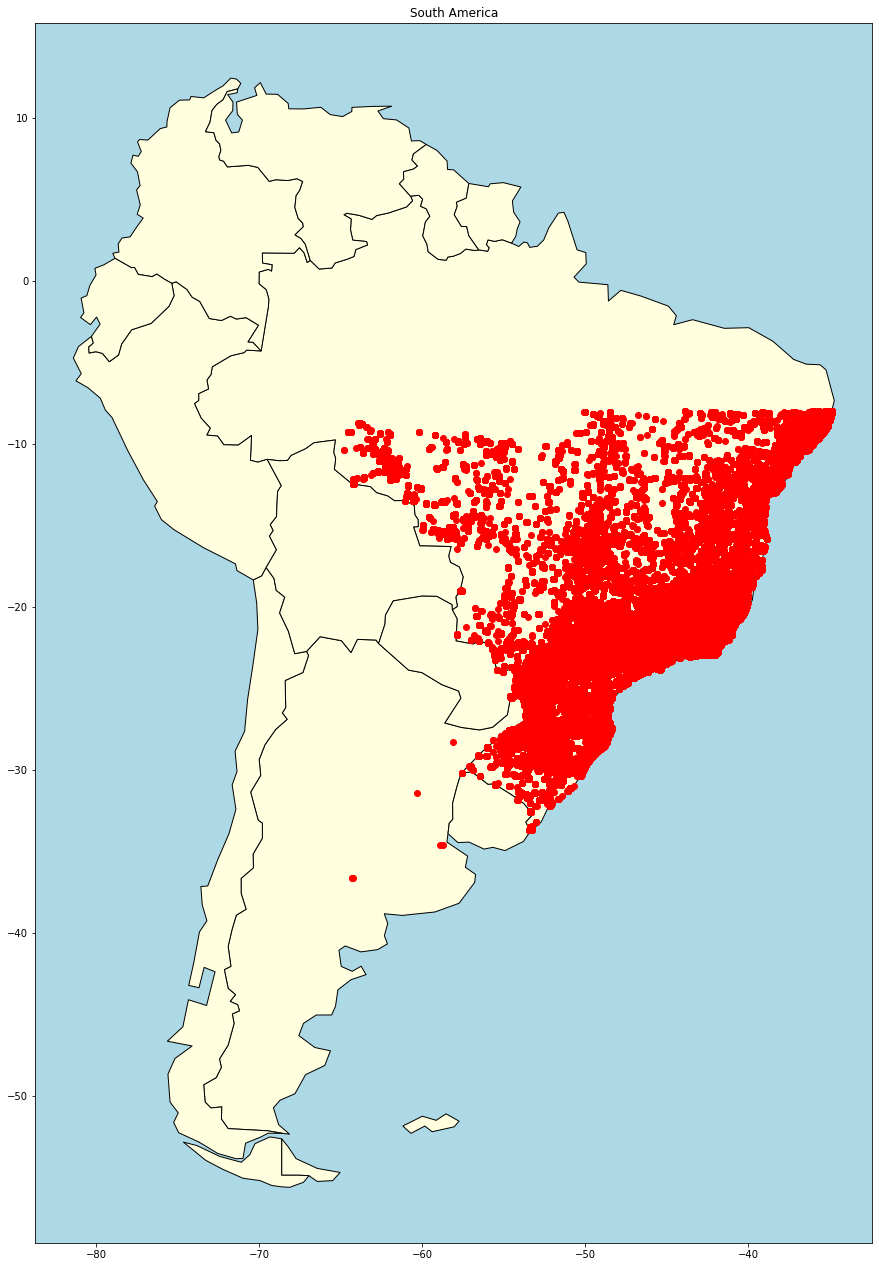

In [3]:
gdf = pd.DataFrame(geo_loc, columns = ['geolocation_city', 'geolocation_state', 'geolocation_lat','geolocation_lng'])
df_geo = gpd.GeoDataFrame(gdf, geometry = gpd.points_from_xy(gdf.geolocation_lng,gdf.geolocation_lat))
southamerica = df_geo[df_geo['geolocation_lng'] > -65 ]
southamericalat =southamerica[southamerica['geolocation_lat'] < -8]
brazil_olistmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = brazil_olistmap[brazil_olistmap.continent=='South America'].plot(color = 'lightyellow' ,edgecolor='black')                                                                       
plt.title('South America')
ax = plt.gca()
ax.set_facecolor('lightblue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,25)
southamericalat.plot(ax = axis,color='red')

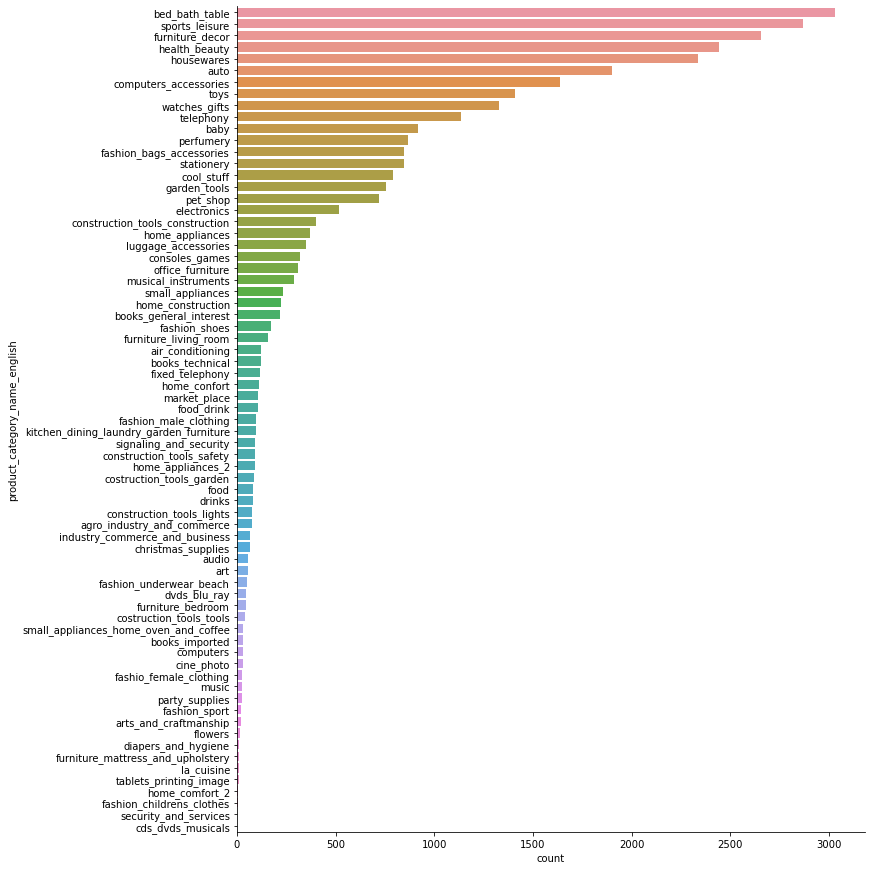

In [4]:
merged_invn = inventory.merge(translate,on=['product_category_name'])
sb.catplot(y = "product_category_name_english", data = merged_invn, kind = "count",
           order = merged_invn["product_category_name_english"].value_counts().index ,height=12)

The categorical plot above shows the number of product belong to a particular category.
Base on the plot, there seems a large range of products related to Sports & Leisure, Home furniture/appliance,Computer acessories and Health & Beauty.

In [5]:
product_orders=inventory.merge(order_item, on="product_id")
product_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  112650 non-null  object 
 1   product_category_name       111047 non-null  object 
 2   product_name_lenght         111047 non-null  float64
 3   product_description_lenght  111047 non-null  float64
 4   product_photos_qty          111047 non-null  float64
 5   product_weight_g            112632 non-null  float64
 6   product_length_cm           112632 non-null  float64
 7   product_height_cm           112632 non-null  float64
 8   product_width_cm            112632 non-null  float64
 9   order_id                    112650 non-null  object 
 10  order_item_id               112650 non-null  int64  
 11  seller_id                   112650 non-null  object 
 12  shipping_limit_date         112650 non-null  object 
 13  price         

In [6]:
# no of unique product
len(product_orders['product_id'].unique())

32951

In [7]:
# popular items id
print(product_orders["product_id"].value_counts())

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6b04a3268d84351b65aeba3f1fbc2a25      1
a5c6bb44f99a90b26c7871fd02d0b0e0      1
af5606ac1cb97d0519a67bd7d9af79b6      1
fbe6d5795a52b760e25a4e9677a2e217      1
7b73a648fbaac51347a498d0a0b93740      1
Name: product_id, Length: 32951, dtype: int64


Text(0.5, 1.0, 'Popular products')

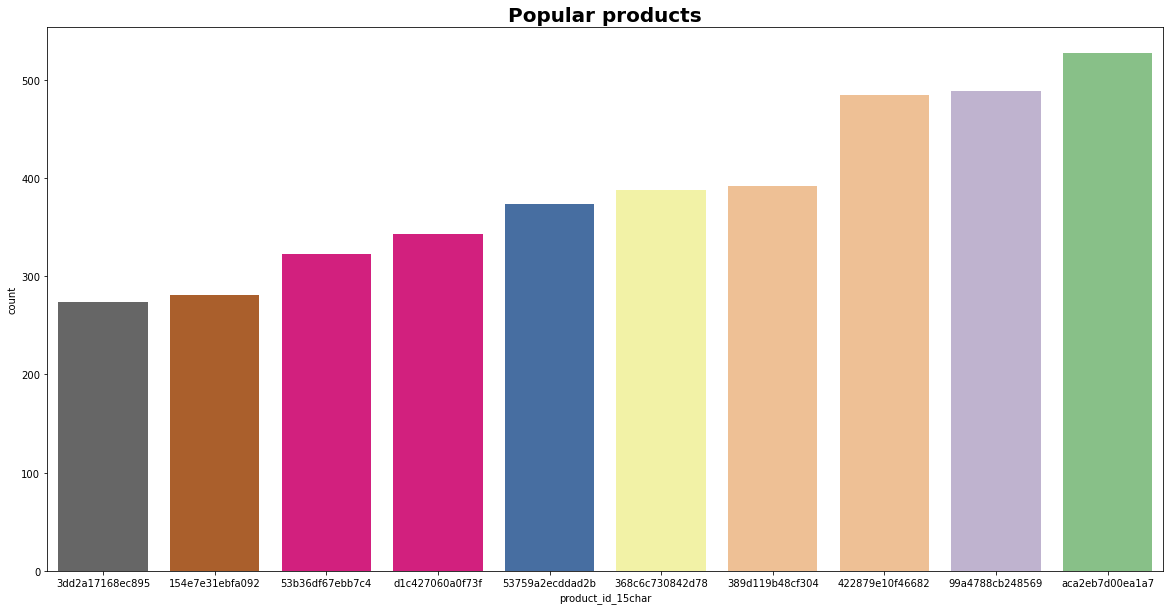

In [8]:
# shorten id due to unable to display long id inside count plot
product_orders['product_id_15char']=product_orders['product_id'].str[:15]
#Plotting popular Products
plt.figure(figsize=(20,10))
sb.countplot(x='product_id_15char', data=product_orders, palette='Accent_r',
             order=product_orders['product_id_15char'].value_counts()[:10]\
             .sort_values().index).set_title("Popular products", fontsize=20,
                                             weight='bold')

The above count plot shows the top 10 most popular product with their unique ID. The y axis shows the number of quantity each individual product sold. The most popular product sold 527 of it

In [9]:
order_payment = pd.merge(payment,order_info)
top_spender = pd.DataFrame(order_payment, columns = ['customer_id', 'order_id', 'payment_value'])
top_spender.head()

,customer_id,order_id,payment_value
0,0a8556ac6be836b46b3e89920d59291c,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,f2c7fc58a9de810828715166c672f10a,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25b14b69de0b6e184ae6fe2755e478f9,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,7a5d8efaaa1081f800628c30d2b0728f,ba78997921bbcdc1373bb41e913ab953,107.78
4,15fd6fb8f8312dbb4674e4518d6fa3b3,42fdf880ba16b47b59251dd489d4441a,128.45


In [10]:
# Total unique customer 
len(top_spender['customer_id'].unique())

99440

In [11]:
# customer with most transaction
print(top_spender["customer_id"].value_counts())

9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
b246eeed30b362c09d867b9e598bee51    22
270c23a11d024a44c896d1894b261a83    21
13aa59158da63ba0e93ec6ac2c07aacb    19
                                    ..
c344c11cd7a8b4700639c28d94348b82     1
c659c6ddb8f2dbed68ea0889f16c0f69     1
8d742720a64d27602b567851fbad7798     1
554821b02a376daf0dbc6a9468c6405c     1
ce24092edd3791e3991bdabf0c09778f     1
Name: customer_id, Length: 99440, dtype: int64


Text(0.5, 1.0, 'Customer with most Transaction')

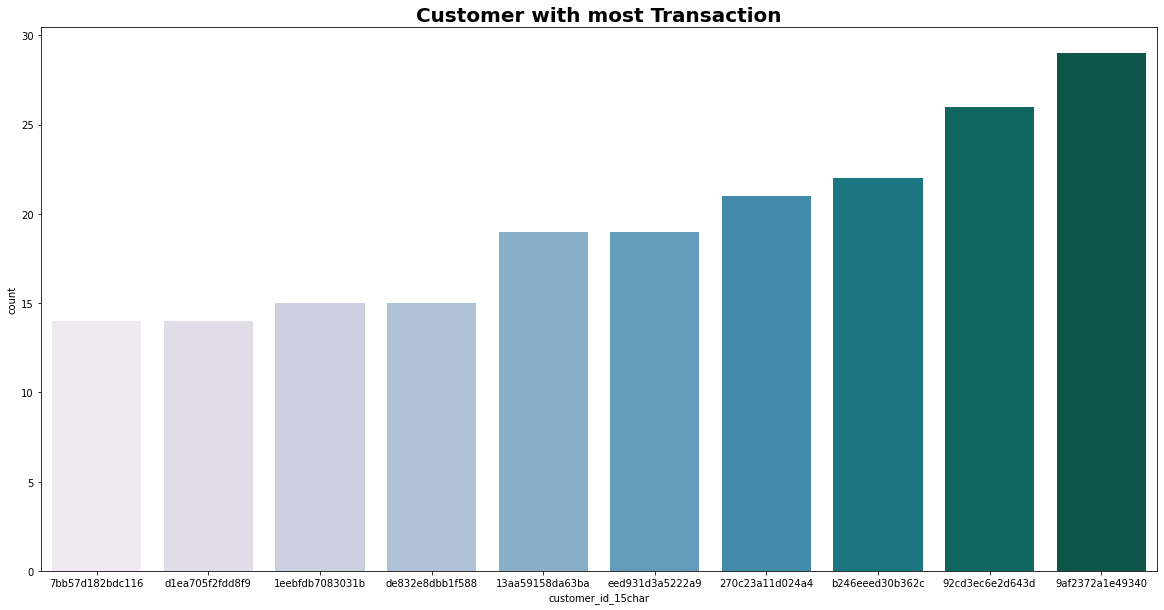

In [12]:
# shorten customer id due to unable to display long id inside count plot
top_spender['customer_id_15char']=top_spender['customer_id'].str[:15]
#Plotting customer with most transaction
plt.figure(figsize=(20,10))
sb.countplot(x='customer_id_15char', data=top_spender, palette='PuBuGn',
             order=top_spender['customer_id_15char'].value_counts()[:10]\
             .sort_values().index).set_title("Customer with most Transaction", fontsize=20,
                                             weight='bold')

The count plot above shows the top 10 customer ids that makes frequent purchases. The customer with most orders made 29 transaction.

In [13]:
seller_info.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
print("Unique SellerIDs :", len(seller_info['seller_id'].unique()))

Unique SellerIDs : 3095


In [15]:
seller_records= pd.DataFrame(order_item[['seller_id', 'price']])
seller_records = seller_records.rename(columns = {'price': 'total_sale'}, inplace = False)
print("Shape of SellerRecords", seller_records.shape)

Shape of SellerRecords (112650, 2)


In [16]:
aggregation_functions = {'total_sale': 'sum'}
seller_total_sale = seller_records.groupby(seller_records['seller_id']).aggregate(aggregation_functions).reset_index()
seller_sorted_sale=seller_total_sale.sort_values(by='total_sale', ascending=False)
#print("The top 10 Sellers are:")
seller_sorted_sale.head(10)

,seller_id,total_sale
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
1560,7e93a43ef30c4f03f38b393420bc753a,176431.87
2643,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
1505,7a67c85e85bb2ce8582c35f2203ad736,141745.53
192,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
1824,955fee9216a65b617aa5c0531780ce60,135171.70


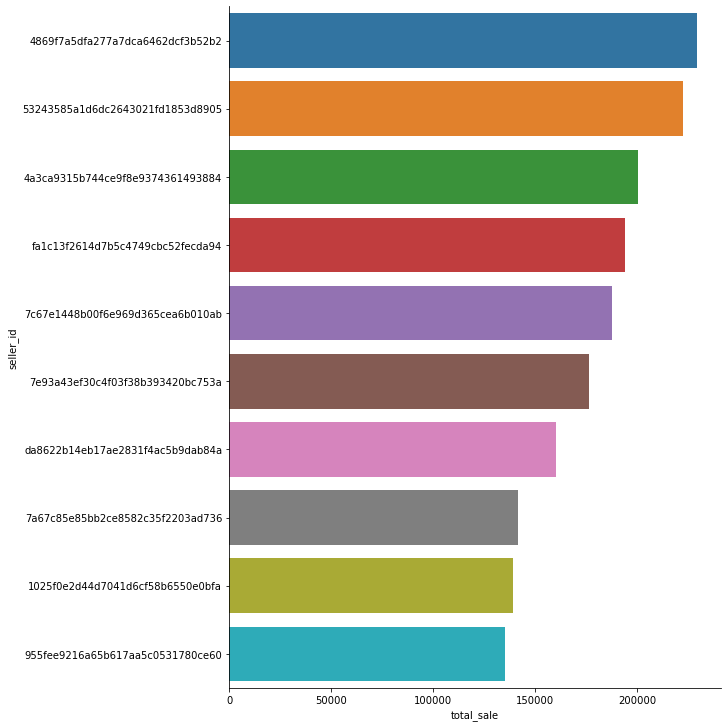

In [17]:
sb.catplot(y = 'seller_id',x = 'total_sale', data = seller_sorted_sale.head(10), kind = "bar", height = 10)

In [18]:
print("Unique payment_type :", len(payment['payment_type'].unique()))
print(payment['payment_type'].unique())

Unique payment_type : 5
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [19]:
sorted_payment = payment['payment_type'].value_counts().rename_axis('payment_type').reset_index(name='counts')
sorted_payment['payment_type'] = sorted_payment['payment_type'].astype('category')
sorted_payment.head()

,payment_type,counts
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


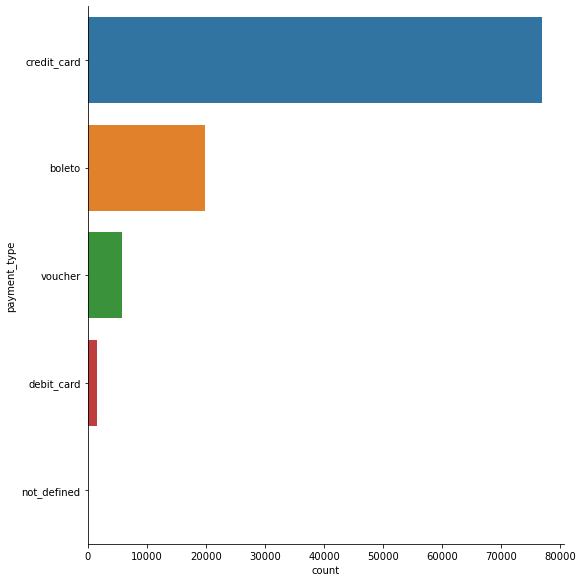

In [20]:
sb.catplot(y = 'payment_type', data = payment, kind = "count", height = 8)

From this, we can see that majority of the transactions are made through Credit Card.

In [21]:
product_cat=pd.DataFrame(inventory[['product_id', 'product_category_name']])
product_cat.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [22]:
order_prod_id=pd.DataFrame(order_item[['order_id', 'product_id']])
order_prod_id.head()

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089


In [23]:
order_status=(order_info[['order_id', 'order_status']])
order_status.head()

,order_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered


In [24]:
temp = pd.merge(order_prod_id, order_status, on='order_id')
product_cat = product_cat.merge(temp, on='product_id')
product_cat = product_cat[product_cat['order_status']== 'delivered']

product_cat = pd.merge(translate, product_cat, on='product_category_name')
product_cat.drop(columns=['product_category_name'], inplace = True)

product_cat.head(10)

,product_category_name_english,product_id,order_id,order_status
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,a41753c6a1d8accb89732e36243432d7,delivered
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,6a1594b5f5cfc5bac6dcdc3f48f22b5e,delivered
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,f6fbf7907913892ffc12ada3bff286ba,delivered
3,health_beauty,36555a2f528d7b2a255c504191445d39,a63144d37a00c28ef382668a5d5ece8b,delivered
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,3ea7135b7064169abacfc10aa72f2e3a,delivered
5,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,93d7cfb112111edec49fd02555f48da3,delivered
6,health_beauty,75b4372e69a42f8ae1d908c076f547b2,396b08e638fbc9a9d6747df738dbd29c,delivered
7,health_beauty,75b4372e69a42f8ae1d908c076f547b2,d9f834b712ac280bbbbcd7a3114c240c,delivered
8,health_beauty,75b4372e69a42f8ae1d908c076f547b2,dd8c2ff157394afacbcc50a161e1af4e,delivered
9,health_beauty,75b4372e69a42f8ae1d908c076f547b2,f409f5ae35c08a9135d9e5d15ec6ab67,delivered


In [25]:
print("Number of orders from each Category:\n",product_cat['product_category_name_english'].value_counts())

Number of orders from each Category:
 bed_bath_table               10953
health_beauty                 9465
sports_leisure                8431
furniture_decor               8160
computers_accessories         7644
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64


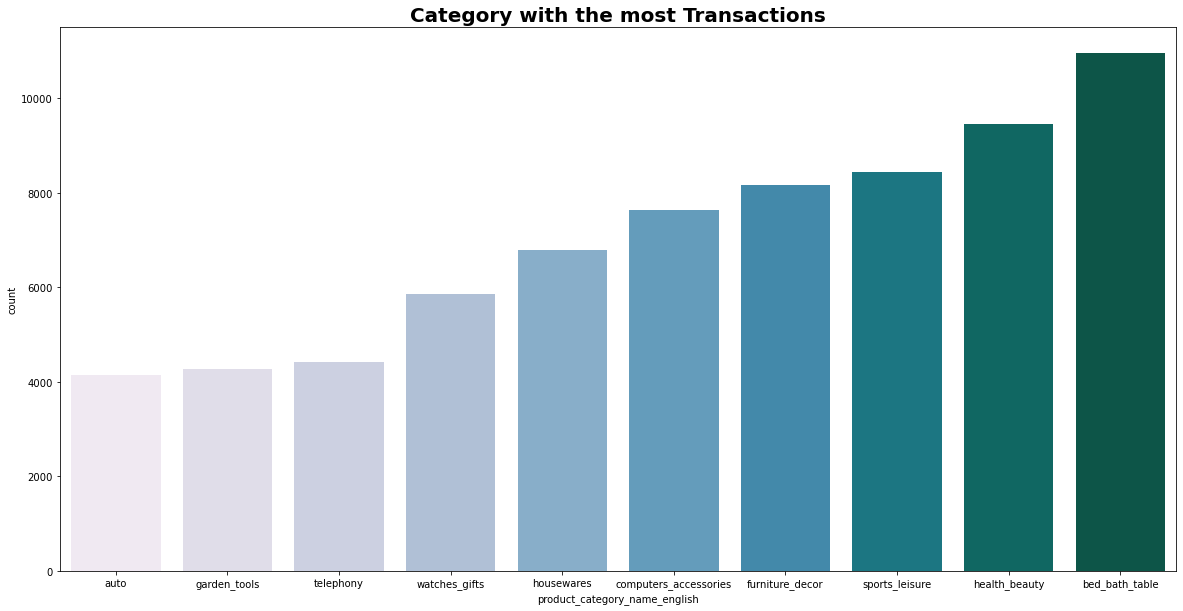

In [26]:
#Plotting customer with most transaction
plt.figure(figsize=(20,10))
sb.countplot(x='product_category_name_english', data=product_cat, palette='PuBuGn',
             order=product_cat['product_category_name_english'].value_counts()[:10]\
             .sort_values().index).set_title("Category with the most Transactions", fontsize=20,
                                             weight='bold')
plt.show()

In [27]:
product_photos = pd.DataFrame(inventory[['product_id', 'product_photos_qty']])
seller_id = pd.DataFrame(order_item[['seller_id', 'product_id']])
seller_product_photos = pd.merge(seller_id, product_photos, on='product_id')
aggregation_functions = {'product_photos_qty': 'sum'}
total_photos = seller_product_photos.groupby(seller_product_photos['seller_id']).aggregate(aggregation_functions).reset_index()
total_photos = total_photos.rename(columns = {'product_photos_qty': 'total_photos'}, inplace = False).sort_values(by='total_photos', ascending=False)

total_photos.head(10)

,seller_id,total_photos
1824,955fee9216a65b617aa5c0531780ce60,8929.0
1235,6560211a19b47992c3666cc44a7e94c0,8721.0
2836,ea8482cd71df3c1969d7b9473ff13abc,5450.0
731,3d871de0142ce09b7081e2b9d1733cb1,4022.0
368,1f50f920176fa81dab994f9023523100,3852.0
2481,cc419e0650a3c5ba77189a1882b7556a,3389.0
3005,f8db351d8c4c4c22c6835c19a46f01b0,2586.0
668,391fc6631aebcf3004804e51b40bcf1e,2324.0
881,4a3ca9315b744ce9f8e9374361493884,2254.0
2818,e9779976487b77c6d4ac45f75ec7afe9,2193.0


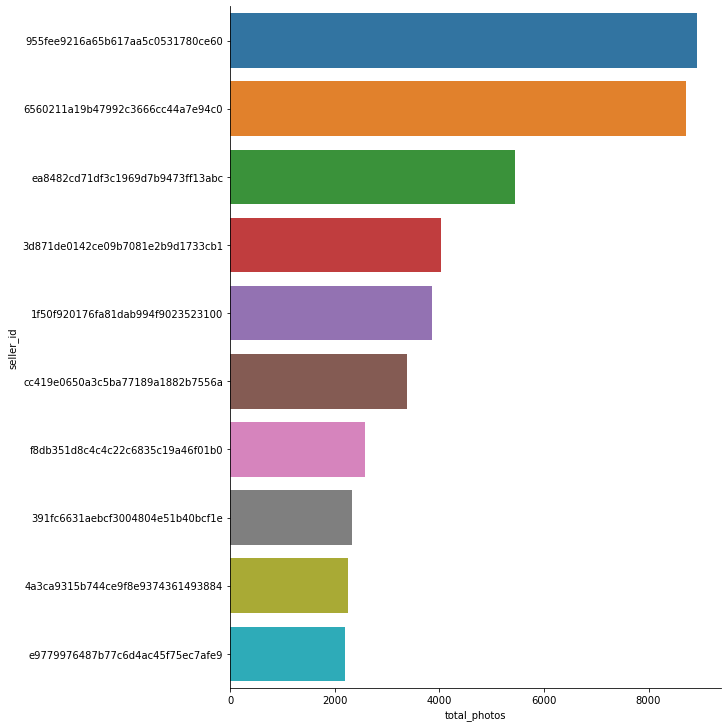

In [28]:
sb.catplot(y = 'seller_id',x = 'total_photos', data = total_photos.head(10), kind = "bar", height = 10)
plt.show()

This bar chart shows the top 10 sellers which posted the highest number of photos.

In [29]:
product_per_seller = pd.DataFrame(seller_id[['seller_id']])
product_per_seller = product_per_seller.value_counts().rename_axis('seller_id').reset_index(name='number_of_product')
product_per_seller.head(10)

,seller_id,number_of_product
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
5,955fee9216a65b617aa5c0531780ce60,1499
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428
7,7c67e1448b00f6e969d365cea6b010ab,1364
8,ea8482cd71df3c1969d7b9473ff13abc,1203
9,7a67c85e85bb2ce8582c35f2203ad736,1171


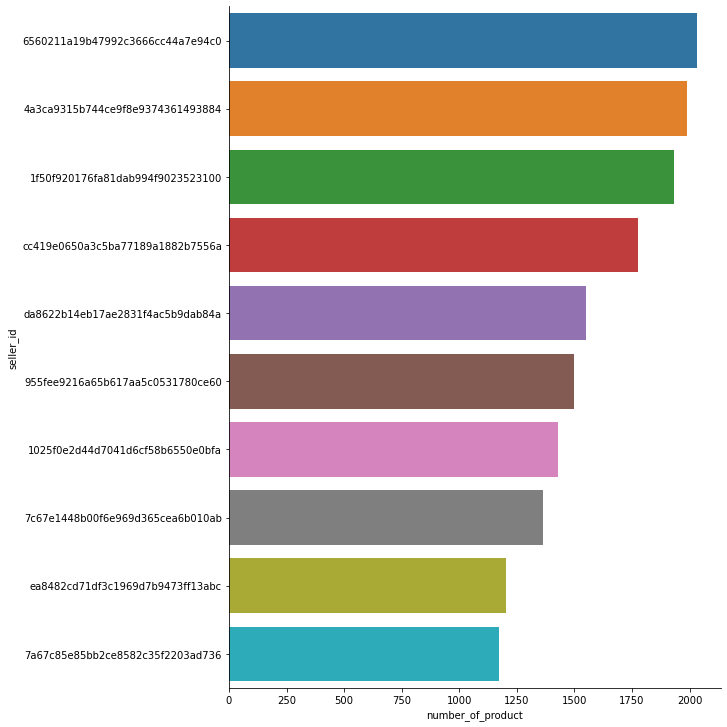

In [30]:
sb.catplot(y = 'seller_id',x = 'number_of_product', data = product_per_seller.head(10), kind = "bar", height = 10)
plt.show()

This bar chart shows the top 10 sellers selling the most unique products

# Problem Formulation

# Data Preparation

## Adding Total sales into Seller info

In [31]:
# Getting only the orders that have been delievered 
del_order_id = order_info[order_info['order_delivered_customer_date'].isna() == 0][order_info['order_status'] == 'delivered']['order_id']
delivered_order = order_item[order_item.order_id.isin(del_order_id)].drop_duplicates("order_id", ignore_index = True)
delivered_order.head()

<ipython-input-31-9ac405a77307>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del_order_id = order_info[order_info['order_delivered_customer_date'].isna() == 0][order_info['order_status'] == 'delivered']['order_id']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [32]:
#Total all time sales 
total_seller_sales = delivered_order.groupby('seller_id')['price'].sum().reset_index()
total_seller_sales.head()

,seller_id,price
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,20311.54
2,002100f778ceb8431b7a1020ff7ab48f,1133.10
3,003554e2dce176b5555353e4f3555ac8,120.00
4,004c9cd9d87a3c30c522c48c4fc07416,17866.03


In [33]:
total_sale_seller = seller_info.merge(total_seller_sales, how='outer', on='seller_id') 
total_sale_seller.rename(columns={'price':"total_sales"}, inplace =True)
new_seller_info = total_sale_seller.drop_duplicates("seller_id", ignore_index = True)
new_seller_info.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,total_sales
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,207.90
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,11183.27
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,158.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,79.99
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,167.99


Now we have the all-time total sales of each seller, we can use some variables to predict the total sales given a time period.

## Merging the order_info and order_item together

We want to merge the 2 DataFrame because we feel that it is easier to access all the relevant information of the transaction of a certain sale.

In [34]:
to_merge_w_del = order_info[order_info.order_id.isin(delivered_order['order_id'])].sort_values('order_id')
merged_ord = delivered_order.merge(to_merge_w_del,on=['order_id'])
merged_ord.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


## Drop new sellers (Active for 1 month)

In [35]:
#Getting the first sale of each seller
first_sale = pd.DataFrame(merged_ord.groupby('seller_id')['order_purchase_timestamp'].min())
first_sale.rename(columns={'order_purchase_timestamp':'first_sale'}, inplace=True)
first_sale.head()

,first_sale
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05
001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04
002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31
003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25
004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34


In [36]:
#Getting the last sale of each seller
latest_sale = pd.DataFrame(merged_ord.groupby('seller_id')['order_purchase_timestamp'].max())
latest_sale.rename(columns={'order_purchase_timestamp':'latest_sale'}, inplace=True)
latest_sale.head()

,latest_sale
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34
001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26
002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23
003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25
004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38


In [37]:
first_last_sale = pd.concat([first_sale, latest_sale], axis=1)
first_last_sale.head()

,first_sale,latest_sale
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34
001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2018-07-12 21:38:26
002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2018-04-12 12:58:23
003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25
004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34,2018-05-03 11:13:38


In [38]:
ordered_seller = new_seller_info.sort_values("seller_id")
ordered_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,total_sales
2913,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP,2685.00
1109,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,20311.54
977,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ,NaN
485,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP,1133.10
1780,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO,120.00


In [39]:
new_seller = ordered_seller.merge(first_last_sale,on=['seller_id'])
new_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,total_sales,first_sale,latest_sale
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP,2685.00,2017-09-26 22:17:05,2017-10-18 08:16:34
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,20311.54,2017-02-04 19:06:04,2018-07-12 21:38:26
2,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP,1133.10,2017-09-14 01:00:31,2018-04-12 12:58:23
3,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO,120.00,2017-12-15 06:52:25,2017-12-15 06:52:25
4,004c9cd9d87a3c30c522c48c4fc07416,14940,ibitinga,SP,17866.03,2017-01-27 10:34:34,2018-05-03 11:13:38


In [40]:
days_active = pd.DataFrame((pd.to_datetime(new_seller['latest_sale'])-pd.to_datetime(new_seller['first_sale'])).apply(lambda x : x.days+1), columns = ['days_active'])
days_active

,days_active
0,22
1,524
2,211
3,1
4,462
...,...
2955,179
2956,532
2957,226
2958,398


In [41]:
new_seller1 = pd.concat([new_seller, days_active], axis=1)
new_seller_info = new_seller1[new_seller1['days_active'] > 31]
new_seller_info

,seller_id,seller_zip_code_prefix,seller_city,seller_state,total_sales,first_sale,latest_sale,days_active
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,20311.54,2017-02-04 19:06:04,2018-07-12 21:38:26,524
2,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP,1133.10,2017-09-14 01:00:31,2018-04-12 12:58:23,211
4,004c9cd9d87a3c30c522c48c4fc07416,14940,ibitinga,SP,17866.03,2017-01-27 10:34:34,2018-05-03 11:13:38,462
5,00720abe85ba0859807595bbf045a33b,7070,guarulhos,SP,691.90,2018-01-27 13:46:31,2018-08-03 16:57:01,189
8,00ee68308b45bc5e2660cd833c3f81cc,3333,sao paulo,SP,16285.00,2017-09-19 01:02:44,2018-08-09 20:45:10,325
...,...,...,...,...,...,...,...,...
2955,ffc470761de7d0232558ba5e786e57b7,7091,guarulhos,SP,1326.72,2018-02-20 18:47:21,2018-08-17 20:31:07,179
2956,ffdd9f82b9a447f6f8d4b91554cc7dd3,80030,curitiba,PR,1823.60,2017-03-05 16:21:27,2018-08-19 14:37:08,532
2957,ffeee66ac5d5a62fe688b9d26f83f534,15130,mirassol,SP,1839.86,2017-09-30 15:56:56,2018-05-14 08:55:22,226
2958,fffd5413c0700ac820c7069d66d98c89,13908,amparo,SP,8133.30,2017-07-24 21:13:55,2018-08-26 19:56:12,398


In [42]:
merged_ord = merged_ord[merged_ord.seller_id.isin(new_seller_info['seller_id'])]
merged_ord

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96465,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
96466,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
96467,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
96468,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


## Variables to consider

#### We have discussed and felt that the following variables could have a high correlation with Total Sales.
<p> 1) Total transactions of a seller<p/>
<p> 2) Total Unique product of a seller<p/>
<p> 3) Total photos posted by a seller<p/>
<p> 4) Average rating of a seller<p/>
<p> 5) Total freight value by a seller<p/>

### Total Transactions of a seller

In [43]:
total_trans = merged_ord.groupby('seller_id')['order_id'].count()
total_trans.name = 'total_trans'
total_trans

seller_id
001cca7ae9ae17fb1caed9dfb1094831    194
002100f778ceb8431b7a1020ff7ab48f     49
004c9cd9d87a3c30c522c48c4fc07416    155
00720abe85ba0859807595bbf045a33b     13
00ee68308b45bc5e2660cd833c3f81cc    133
                                   ... 
ffc470761de7d0232558ba5e786e57b7     27
ffdd9f82b9a447f6f8d4b91554cc7dd3     18
ffeee66ac5d5a62fe688b9d26f83f534     14
fffd5413c0700ac820c7069d66d98c89     54
ffff564a4f9085cd26170f4732393726      8
Name: total_trans, Length: 2120, dtype: int64

### Total Unique product sold

In [44]:
uni_prod = merged_ord.groupby('seller_id')['product_id'].nunique()
uni_prod.name = 'total_uni_prod'
uni_prod

seller_id
001cca7ae9ae17fb1caed9dfb1094831    11
002100f778ceb8431b7a1020ff7ab48f    23
004c9cd9d87a3c30c522c48c4fc07416    84
00720abe85ba0859807595bbf045a33b     9
00ee68308b45bc5e2660cd833c3f81cc    23
                                    ..
ffc470761de7d0232558ba5e786e57b7    14
ffdd9f82b9a447f6f8d4b91554cc7dd3    12
ffeee66ac5d5a62fe688b9d26f83f534     3
fffd5413c0700ac820c7069d66d98c89    27
ffff564a4f9085cd26170f4732393726     6
Name: total_uni_prod, Length: 2120, dtype: int64

### Total photos posted by a seller

In [45]:
photo_quan = pd.merge(inventory[['product_id','product_photos_qty']], merged_ord[['seller_id','product_id']], on='product_id')
photo_quan.drop_duplicates('product_id')
photo_quan = photo_quan.groupby('seller_id')['product_photos_qty'].sum()
photo_quan.name = 'total_photos'
photo_quan

seller_id
001cca7ae9ae17fb1caed9dfb1094831    337.0
002100f778ceb8431b7a1020ff7ab48f     49.0
004c9cd9d87a3c30c522c48c4fc07416    147.0
00720abe85ba0859807595bbf045a33b     30.0
00ee68308b45bc5e2660cd833c3f81cc    146.0
                                    ...  
ffc470761de7d0232558ba5e786e57b7     41.0
ffdd9f82b9a447f6f8d4b91554cc7dd3     22.0
ffeee66ac5d5a62fe688b9d26f83f534     69.0
fffd5413c0700ac820c7069d66d98c89    139.0
ffff564a4f9085cd26170f4732393726     22.0
Name: total_photos, Length: 2120, dtype: float64

### Average rating of a seller

In [46]:
avg_rating = pd.merge(review[['review_score','order_id']], merged_ord[['seller_id','order_id']], on='order_id')
avg_rating = avg_rating.groupby('seller_id')['review_score'].mean()
avg_rating.name = 'avg_rating'
avg_rating

seller_id
001cca7ae9ae17fb1caed9dfb1094831    4.041237
002100f778ceb8431b7a1020ff7ab48f    3.940000
004c9cd9d87a3c30c522c48c4fc07416    4.104938
00720abe85ba0859807595bbf045a33b    3.615385
00ee68308b45bc5e2660cd833c3f81cc    4.305970
                                      ...   
ffc470761de7d0232558ba5e786e57b7    4.444444
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.333333
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    4.037037
ffff564a4f9085cd26170f4732393726    3.250000
Name: avg_rating, Length: 2120, dtype: float64

### Total Frieght Value

In [47]:
total_freight = merged_ord.groupby('seller_id')['freight_value'].sum()
total_freight.name = 'total_freight'
total_freight

seller_id
001cca7ae9ae17fb1caed9dfb1094831    7267.40
002100f778ceb8431b7a1020ff7ab48f     719.75
004c9cd9d87a3c30c522c48c4fc07416    3277.10
00720abe85ba0859807595bbf045a33b     182.34
00ee68308b45bc5e2660cd833c3f81cc    2614.03
                                     ...   
ffc470761de7d0232558ba5e786e57b7     373.36
ffdd9f82b9a447f6f8d4b91554cc7dd3     615.63
ffeee66ac5d5a62fe688b9d26f83f534     419.69
fffd5413c0700ac820c7069d66d98c89    2446.21
ffff564a4f9085cd26170f4732393726     115.35
Name: total_freight, Length: 2120, dtype: float64

# Statistical Description

In [48]:
variables = [total_freight,uni_prod,avg_rating,photo_quan,total_trans]
seller_w_var = new_seller_info
for var in variables:
    seller_w_var = seller_w_var.merge(var, on='seller_id')
seller_w_var

,seller_id,seller_zip_code_prefix,seller_city,seller_state,total_sales,first_sale,latest_sale,days_active,total_freight,total_uni_prod,avg_rating,total_photos,total_trans
0,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,20311.54,2017-02-04 19:06:04,2018-07-12 21:38:26,524,7267.40,11,4.041237,337.0,194
1,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP,1133.10,2017-09-14 01:00:31,2018-04-12 12:58:23,211,719.75,23,3.940000,49.0,49
2,004c9cd9d87a3c30c522c48c4fc07416,14940,ibitinga,SP,17866.03,2017-01-27 10:34:34,2018-05-03 11:13:38,462,3277.10,84,4.104938,147.0,155
3,00720abe85ba0859807595bbf045a33b,7070,guarulhos,SP,691.90,2018-01-27 13:46:31,2018-08-03 16:57:01,189,182.34,9,3.615385,30.0,13
4,00ee68308b45bc5e2660cd833c3f81cc,3333,sao paulo,SP,16285.00,2017-09-19 01:02:44,2018-08-09 20:45:10,325,2614.03,23,4.305970,146.0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,7091,guarulhos,SP,1326.72,2018-02-20 18:47:21,2018-08-17 20:31:07,179,373.36,14,4.444444,41.0,27
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,80030,curitiba,PR,1823.60,2017-03-05 16:21:27,2018-08-19 14:37:08,532,615.63,12,4.333333,22.0,18
2117,ffeee66ac5d5a62fe688b9d26f83f534,15130,mirassol,SP,1839.86,2017-09-30 15:56:56,2018-05-14 08:55:22,226,419.69,3,4.214286,69.0,14
2118,fffd5413c0700ac820c7069d66d98c89,13908,amparo,SP,8133.30,2017-07-24 21:13:55,2018-08-26 19:56:12,398,2446.21,27,4.037037,139.0,54


In [49]:
seller_w_var[['total_sales','total_freight','total_uni_prod','avg_rating','total_photos','total_trans']].describe()

,total_sales,total_freight,total_uni_prod,avg_rating,total_photos,total_trans
count,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000
mean,5565.051354,899.219505,14.759906,4.186339,99.425943,44.705189
std,14918.814651,2328.944280,27.060302,0.532929,339.031178,121.222156
min,12.000000,15.560000,1.000000,1.000000,0.000000,2.000000
25%,487.510000,107.795000,3.000000,3.964629,9.000000,5.000000
50%,1464.235000,262.505000,6.000000,4.250000,23.000000,12.000000
75%,4739.342500,795.820000,14.000000,4.500000,78.000000,36.000000
max,221851.450000,36877.430000,370.000000,5.000000,7815.000000,1809.000000


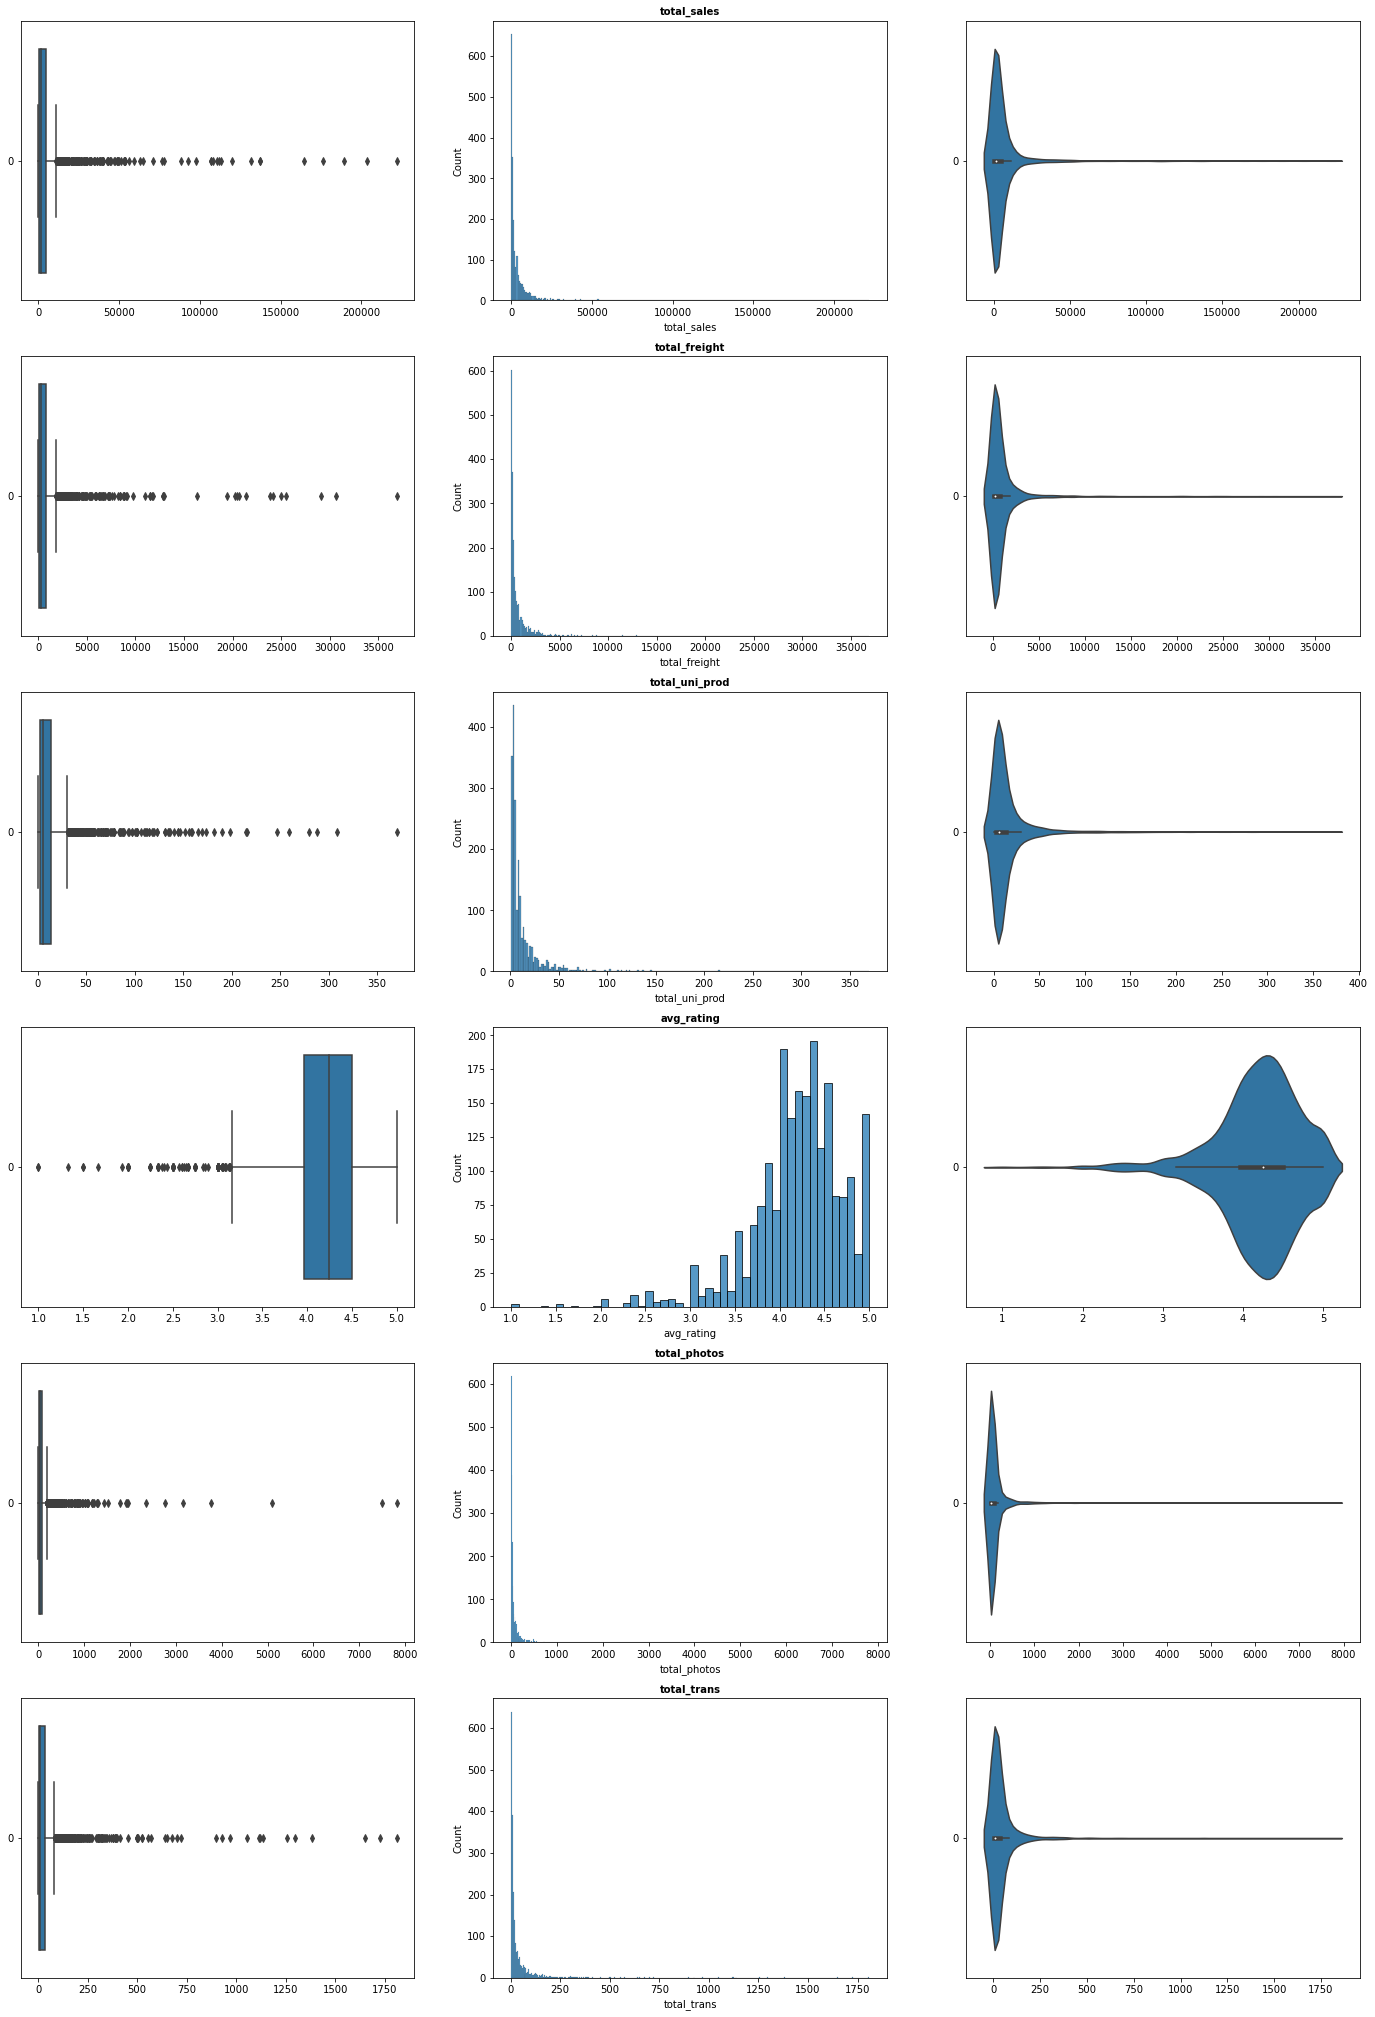

In [50]:
var_plot = ['total_sales','total_freight','total_uni_prod','avg_rating','total_photos','total_trans']
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(6, 3, figsize=(24, 36))

for i in range(6):
    # Plot the basic uni-variate figures for all variables with Total sales
    sb.boxplot(data = seller_w_var[var_plot[i]], orient = "h", ax = axes[i,0])
    sb.histplot(data = seller_w_var[var_plot[i]], ax = axes[i,1]).set_title(var_plot[i], fontsize=10,weight='bold')
    sb.violinplot(data = seller_w_var[var_plot[i]], orient = "h", ax = axes[i,2])
plt.show()

# Exploratory Analysis

In this section, we want to observe the correlation of the 5 selected variables with Total Sales. So that we can consider which variables are suitable as a preditors of total sales.

From the Statistical Description, we can hypothesise that the average rating would have a bad correlation with total sales due to the spread of the data being so different from Total Sales. We will determine if we are right by doing correlation with Total Sales.

### Correlation of Total Transactions of a seller with Total Sales

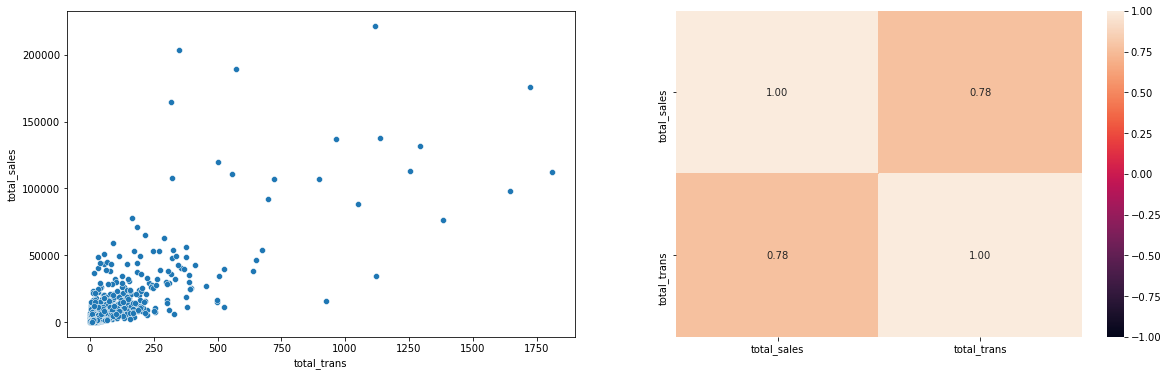

In [51]:
trans_sales_comb = seller_w_var[['total_sales', 'total_trans']]

f, axes = plt.subplots(1,2, figsize=(20, 6))
sb.scatterplot(data=trans_sales_comb, x="total_trans", y="total_sales", ax = axes[0])
sb.heatmap(trans_sales_comb.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### Total Unique product sold

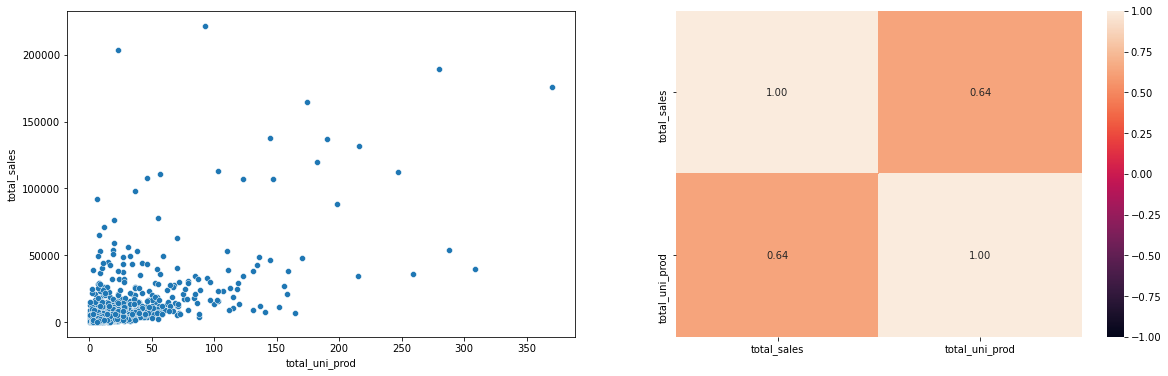

In [52]:
prod_sales_comb = seller_w_var[['total_sales', 'total_uni_prod']]

f, axes = plt.subplots(1,2, figsize=(20, 6))
sb.scatterplot(data=prod_sales_comb, x="total_uni_prod", y="total_sales", ax = axes[0])
sb.heatmap(prod_sales_comb.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### Total photos posted by a seller

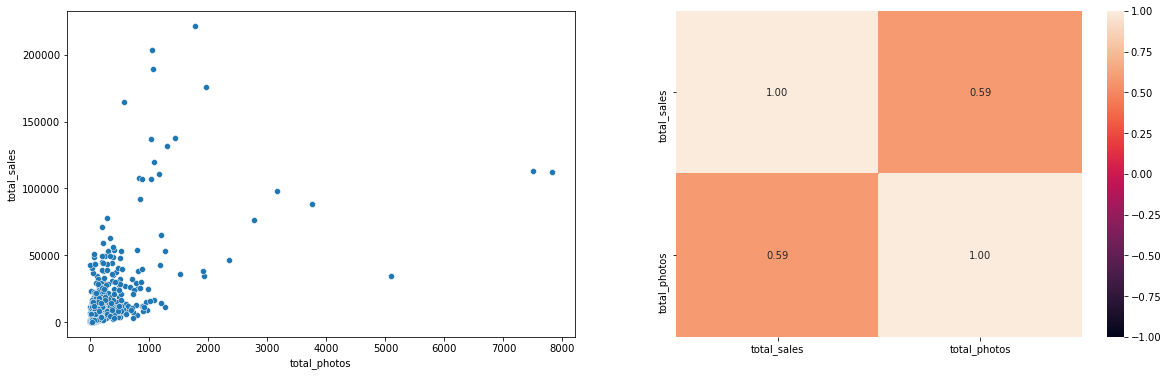

In [53]:
photos_sales_comb = seller_w_var[['total_sales', 'total_photos']]

f, axes = plt.subplots(1,2, figsize=(20, 6))
sb.scatterplot(data=photos_sales_comb, x="total_photos", y="total_sales", ax = axes[0])
sb.heatmap(photos_sales_comb.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### Average rating of a seller

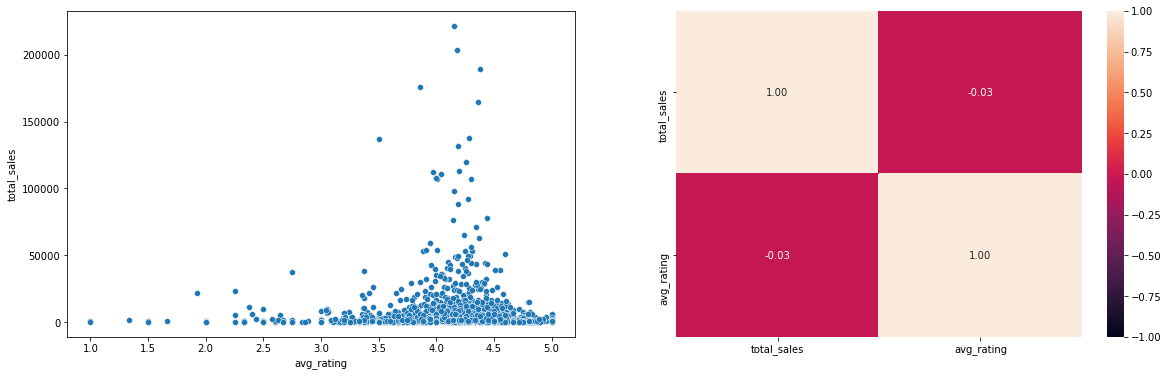

In [54]:
rate_sales_comb = seller_w_var[['total_sales', 'avg_rating']]

f, axes = plt.subplots(1,2, figsize=(20, 6))
sb.scatterplot(data=rate_sales_comb, x="avg_rating", y="total_sales", ax = axes[0])
sb.heatmap(rate_sales_comb.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### Total Frieght Value

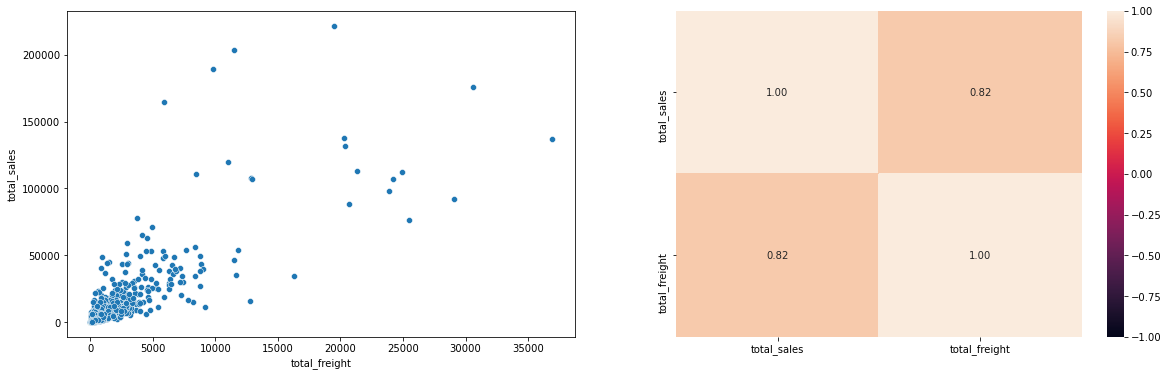

In [55]:
freight_sales_comb = seller_w_var[['total_sales', 'total_freight']]

f, axes = plt.subplots(1,2, figsize=(20, 6))
sb.scatterplot(data=freight_sales_comb, x="total_freight", y="total_sales", ax = axes[0])
sb.heatmap(freight_sales_comb.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Based on the correlation heat map, we can derive that out of the 5 chosen variables, only 4 can be considered as predictors.

# Machine Learning

## Preparing Train Dataset (Start to last 6 months)

In [56]:
train_ord = merged_ord[pd.to_datetime(merged_ord['order_purchase_timestamp']) < pd.to_datetime("2018-02-01")]
train_ord = train_ord[train_ord.seller_id.isin(new_seller_info['seller_id'])]
train_ord

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96460,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,2017-12-18 17:33:04,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00
96461,fffb0b1a50e65c449020434fa835e078,1,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96,46b385c6d972b73cbcf797a8b16c072d,delivered,2017-04-12 16:35:43,2017-04-12 16:45:12,2017-04-27 09:26:54,2017-05-17 11:38:22,2017-05-15 00:00:00
96463,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00
96467,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00


### Sales for Train

In [57]:
train_sales = train_ord.groupby('seller_id')['price'].sum().reset_index()
train_sales.rename(columns = {'price': 'train_sales'}, inplace = True)
train_sales = pd.DataFrame(new_seller_info['seller_id']).merge(train_sales,how='left', left_on='seller_id', right_on='seller_id')
train_sales['train_sales'] = train_sales['train_sales'].fillna(0)
train_sales.head()

,seller_id,train_sales
0,001cca7ae9ae17fb1caed9dfb1094831,18373.74
1,002100f778ceb8431b7a1020ff7ab48f,776.00
2,004c9cd9d87a3c30c522c48c4fc07416,15925.32
3,00720abe85ba0859807595bbf045a33b,78.00
4,00ee68308b45bc5e2660cd833c3f81cc,8507.00


### Number of Transaction of seller for Train

In [58]:
train_trans = train_ord.groupby('seller_id')['order_id'].count()
train_trans.name = 'train_trans'
train_trans = pd.DataFrame(new_seller_info['seller_id']).merge(train_trans,how='left', left_on='seller_id', right_on='seller_id')
train_trans['train_trans'] = train_trans['train_trans'].fillna(0)
train_trans.head()

,seller_id,train_trans
0,001cca7ae9ae17fb1caed9dfb1094831,178.0
1,002100f778ceb8431b7a1020ff7ab48f,40.0
2,004c9cd9d87a3c30c522c48c4fc07416,138.0
3,00720abe85ba0859807595bbf045a33b,1.0
4,00ee68308b45bc5e2660cd833c3f81cc,83.0


### Unique Product sold by a seller for Train

In [59]:
train_uni_prod = train_ord.groupby('seller_id')['product_id'].nunique()
train_uni_prod.name = 'train_uni_prod'
train_uni_prod = pd.DataFrame(new_seller_info['seller_id']).merge(train_uni_prod,how='left', left_on='seller_id', right_on='seller_id')
train_uni_prod['train_uni_prod'] = train_uni_prod['train_uni_prod'].fillna(0)
train_uni_prod.head()

,seller_id,train_uni_prod
0,001cca7ae9ae17fb1caed9dfb1094831,9.0
1,002100f778ceb8431b7a1020ff7ab48f,17.0
2,004c9cd9d87a3c30c522c48c4fc07416,78.0
3,00720abe85ba0859807595bbf045a33b,1.0
4,00ee68308b45bc5e2660cd833c3f81cc,15.0


### Total Photos by a seller for Train

In [60]:
photos = inventory[['product_id', 'product_photos_qty']]

def photo_func(product_id):
    photos = inventory[['product_id', 'product_photos_qty']]
    return photos[photos['product_id']==product_id]['product_photos_qty'].iloc[0]

In [61]:
#this portion is to merge with the 3 months photos dataset to get the number of photos the seller post within the 3 months
temp_df = train_ord.copy()
temp_df = temp_df.apply(lambda row: photo_func(row['product_id']), axis=1)
temp_df.head()

0    4.0
1    2.0
2    2.0
4    1.0
5    1.0
dtype: float64

In [62]:
train_photo_quan = train_ord.merge(pd.DataFrame(pd.DataFrame(temp_df, columns = ['train_photo_quan'])), on=temp_df.index)[['seller_id','product_id', 'train_photo_quan']]
train_photo_quan = train_photo_quan.drop_duplicates(subset = ['product_id'])
train_photo_quan = train_photo_quan.groupby('seller_id')['train_photo_quan'].sum()
train_photo_quan = pd.DataFrame(new_seller_info['seller_id']).merge(train_photo_quan,how='left', left_on='seller_id', right_on='seller_id')
train_photo_quan['train_photo_quan'] = train_photo_quan['train_photo_quan'].fillna(0)
train_photo_quan

,seller_id,train_photo_quan
0,001cca7ae9ae17fb1caed9dfb1094831,16.0
1,002100f778ceb8431b7a1020ff7ab48f,17.0
2,004c9cd9d87a3c30c522c48c4fc07416,76.0
3,00720abe85ba0859807595bbf045a33b,2.0
4,00ee68308b45bc5e2660cd833c3f81cc,15.0
...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.0
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,10.0
2117,ffeee66ac5d5a62fe688b9d26f83f534,10.0
2118,fffd5413c0700ac820c7069d66d98c89,40.0


### Total Frieght Value for Train

In [63]:
train_freight_value = train_ord.groupby('seller_id')['freight_value'].sum()
train_freight_value.name = 'train_freight_value'
train_freight_value = pd.DataFrame(new_seller_info['seller_id']).merge(train_freight_value,how='left', left_on='seller_id', right_on='seller_id')
train_freight_value['train_freight_value'] = train_freight_value['train_freight_value'].fillna(0)
train_freight_value.head()

,seller_id,train_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,6469.62
1,002100f778ceb8431b7a1020ff7ab48f,586.93
2,004c9cd9d87a3c30c522c48c4fc07416,2798.38
3,00720abe85ba0859807595bbf045a33b,15.31
4,00ee68308b45bc5e2660cd833c3f81cc,1661.23


## Preparing Validation (Last 6 months - before Last 3 months)

In [64]:
validate_ord = merged_ord[pd.to_datetime("2018-02-01")<pd.to_datetime(merged_ord['order_purchase_timestamp'])]
validate_ord = validate_ord[pd.to_datetime(validate_ord['order_purchase_timestamp'])<pd.to_datetime("2018-05-31")]
validate_ord = validate_ord[validate_ord.seller_id.isin(new_seller_info['seller_id'])]
validate_ord

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,c6fc061d86fab1e2b2eac259bac71a49,delivered,2018-03-24 22:16:10,2018-03-24 22:28:09,2018-03-27 05:26:55,2018-03-29 00:04:19,2018-04-09 00:00:00
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06 00:00:00
15,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,8a250edc40ebc5c3940ebc940f16a7eb,delivered,2018-04-25 09:10:41,2018-04-25 09:33:19,2018-04-27 15:14:00,2018-04-30 17:54:25,2018-05-09 00:00:00
16,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96449,fff1e3e76b816bfe8ef16678cc53c643,1,2e910736c31392d46841f315e9511405,7a67c85e85bb2ce8582c35f2203ad736,2018-03-05 09:08:53,65.99,20.86,e194b91a5dac87c84cc54a7ed3fdad7a,delivered,2018-02-27 08:35:05,2018-02-27 09:08:53,2018-03-02 20:04:21,2018-03-07 14:49:33,2018-03-26 00:00:00
96450,fff2cdc825f9fc0ba3c04227cfa02303,1,044f05bc9de36e8a693a83e4bc79dd0d,ea8482cd71df3c1969d7b9473ff13abc,2018-02-08 02:52:42,24.99,25.63,9c18c06ccf9b2fafcc5f956c5b145212,delivered,2018-02-02 10:28:41,2018-02-03 02:52:42,2018-02-08 00:26:55,2018-03-12 17:08:53,2018-03-06 00:00:00
96458,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19 00:00:00
96462,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27 00:00:00


## Sales for validation

In [65]:
validate_sales = validate_ord.groupby('seller_id')['price'].sum().reset_index()
validate_sales.rename(columns = {'price': 'validate_sales'}, inplace = True)
validate_sales.head()

,seller_id,validate_sales
0,001cca7ae9ae17fb1caed9dfb1094831,1566.90
1,002100f778ceb8431b7a1020ff7ab48f,357.10
2,004c9cd9d87a3c30c522c48c4fc07416,1940.71
3,00720abe85ba0859807595bbf045a33b,389.10
4,00ee68308b45bc5e2660cd833c3f81cc,7513.00


## Transaction of seller for validation

In [66]:
validate_trans = validate_ord.groupby('seller_id')['order_id'].count()
validate_trans.name = 'validate_trans'
validate_trans.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    13
002100f778ceb8431b7a1020ff7ab48f     9
004c9cd9d87a3c30c522c48c4fc07416    17
00720abe85ba0859807595bbf045a33b     9
00ee68308b45bc5e2660cd833c3f81cc    46
Name: validate_trans, dtype: int64

## Unique Product sold by a seller for validation

In [67]:
validate_uni_prod = validate_ord.groupby('seller_id')['product_id'].nunique()
validate_uni_prod.name = 'validate_uni_prod'
validate_uni_prod.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831     6
002100f778ceb8431b7a1020ff7ab48f     8
004c9cd9d87a3c30c522c48c4fc07416    14
00720abe85ba0859807595bbf045a33b     7
00ee68308b45bc5e2660cd833c3f81cc    15
Name: validate_uni_prod, dtype: int64

## Photos by a seller for validation

In [68]:
photos = inventory[['product_id', 'product_photos_qty']]

def photo_func(product_id):
    photos = inventory[['product_id', 'product_photos_qty']]
    return photos[photos['product_id']==product_id]['product_photos_qty'].iloc[0]

In [69]:
#this portion is to merge with the 3 months photos dataset to get the number of photos the seller post within the 3 months
temp_df = validate_ord.copy()
temp_df = temp_df.apply(lambda row: photo_func(row['product_id']), axis=1)
temp_df.head()

8     1.0
10    1.0
13    2.0
15    2.0
16    1.0
dtype: float64

In [70]:
validate_photo_quan = validate_ord.merge(pd.DataFrame(pd.DataFrame(temp_df, columns = ['validate_photo_quan'])), on=temp_df.index)[['seller_id','product_id', 'validate_photo_quan']]
validate_photo_quan = validate_photo_quan.drop_duplicates(subset = ['product_id'])
validate_photo_quan = validate_photo_quan.groupby('seller_id')['validate_photo_quan'].sum()
validate_photo_quan.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    11.0
002100f778ceb8431b7a1020ff7ab48f     8.0
004c9cd9d87a3c30c522c48c4fc07416    11.0
00720abe85ba0859807595bbf045a33b    17.0
00ee68308b45bc5e2660cd833c3f81cc    15.0
Name: validate_photo_quan, dtype: float64

## Frieght Value for validation

In [71]:
validate_freight_value = validate_ord.groupby('seller_id')['freight_value'].sum()
validate_freight_value.name = 'validate_freight_value'
validate_freight_value.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    666.65
002100f778ceb8431b7a1020ff7ab48f    132.82
004c9cd9d87a3c30c522c48c4fc07416    478.72
00720abe85ba0859807595bbf045a33b    128.43
00ee68308b45bc5e2660cd833c3f81cc    903.29
Name: validate_freight_value, dtype: float64

## Preparing Test Data (Last 3 Months)

In [72]:
last_3_months_ord = merged_ord[pd.to_datetime(merged_ord['order_purchase_timestamp'])>pd.to_datetime("2018-05-31")]
last_3_months_ord = last_3_months_ord[last_3_months_ord.seller_id.isin(new_seller_info['seller_id'])]
last_3_months_ord

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00
11,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,6a899e55865de6549a58d2c6845e5604,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,2018-08-07 00:00:00
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22 00:00:00
14,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,530ec6109d11eaaf87999465c6afee01,2018-08-17 12:15:10,99.90,27.65,2a30c97668e81df7c17a8b14447aeeba,delivered,2018-08-14 20:43:09,2018-08-15 12:15:10,2018-08-15 15:28:00,2018-08-22 12:02:27,2018-08-28 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96452,fff3983dfa3c5a0d752d8d17baa406a0,1,092be1e8336fc404c57bd5970d056886,cbd996ad3c1b7dc71fd0e5f5df9087e2,2018-07-16 22:05:13,66.39,14.05,46930ec4a8599d1436787e37f36161d9,delivered,2018-07-14 21:56:14,2018-07-14 22:05:13,2018-07-17 12:23:00,2018-07-27 16:28:51,2018-08-01 00:00:00
96457,fff8286f77788ab8b55b2e5747fa7dd8,1,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,2018-07-05 22:31:13,24.99,15.28,e79f494063c25f5c673222d8a2cc6f47,delivered,2018-07-03 21:53:22,2018-07-05 16:22:01,2018-07-04 14:33:00,2018-07-06 14:51:40,2018-07-20 00:00:00
96464,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23 00:00:00
96466,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00


### Sales for test (last 3 Months)

In [73]:
last3month_sales = last_3_months_ord.groupby('seller_id')['price'].sum().reset_index()
last3month_sales.rename(columns = {'price': 'test_sales'}, inplace = True)
last3month_sales.head()

,seller_id,test_sales
0,001cca7ae9ae17fb1caed9dfb1094831,370.9
1,00720abe85ba0859807595bbf045a33b,224.8
2,00ee68308b45bc5e2660cd833c3f81cc,265.0
3,00fc707aaaad2d31347cf883cd2dfe10,196.4
4,014c0679dd340a0e338872e7ec85666a,340.0


In [74]:
sales_colla = pd.DataFrame(train_sales).merge(last3month_sales,how='left', left_on='seller_id', right_on='seller_id')
sales_colla['test_sales'] = sales_colla['test_sales'].fillna(0)
sales_colla = pd.DataFrame(sales_colla.merge(validate_sales,how='left', left_on='seller_id', right_on='seller_id'))
sales_colla['validate_sales'] = sales_colla['validate_sales'].fillna(0)
sales_colla

,seller_id,train_sales,test_sales,validate_sales
0,001cca7ae9ae17fb1caed9dfb1094831,18373.74,370.90,1566.90
1,002100f778ceb8431b7a1020ff7ab48f,776.00,0.00,357.10
2,004c9cd9d87a3c30c522c48c4fc07416,15925.32,0.00,1940.71
3,00720abe85ba0859807595bbf045a33b,78.00,224.80,389.10
4,00ee68308b45bc5e2660cd833c3f81cc,8507.00,265.00,7513.00
...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.00,490.08,836.64
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,1040.10,210.80,572.70
2117,ffeee66ac5d5a62fe688b9d26f83f534,1359.90,0.00,479.96
2118,fffd5413c0700ac820c7069d66d98c89,4117.90,1019.70,2995.70


### Transaction of seller for Test (last 3 Months)

In [75]:
last3month_trans = last_3_months_ord.groupby('seller_id')['order_id'].count()
last3month_trans.name = 'test_trans'
last3month_trans.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    3
00720abe85ba0859807595bbf045a33b    3
00ee68308b45bc5e2660cd833c3f81cc    4
00fc707aaaad2d31347cf883cd2dfe10    2
014c0679dd340a0e338872e7ec85666a    1
Name: test_trans, dtype: int64

In [76]:
trans_colla = pd.DataFrame(train_trans).merge(last3month_trans,how='left', left_on='seller_id', right_on='seller_id')
trans_colla['test_trans'] = trans_colla['test_trans'].fillna(0)
trans_colla = pd.DataFrame(trans_colla.merge(validate_trans,how='left', left_on='seller_id', right_on='seller_id'))
trans_colla['validate_trans'] = trans_colla['validate_trans'].fillna(0)
trans_colla

,seller_id,train_trans,test_trans,validate_trans
0,001cca7ae9ae17fb1caed9dfb1094831,178.0,3.0,13.0
1,002100f778ceb8431b7a1020ff7ab48f,40.0,0.0,9.0
2,004c9cd9d87a3c30c522c48c4fc07416,138.0,0.0,17.0
3,00720abe85ba0859807595bbf045a33b,1.0,3.0,9.0
4,00ee68308b45bc5e2660cd833c3f81cc,83.0,4.0,46.0
...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.0,11.0,16.0
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,8.0,4.0,6.0
2117,ffeee66ac5d5a62fe688b9d26f83f534,10.0,0.0,4.0
2118,fffd5413c0700ac820c7069d66d98c89,24.0,8.0,22.0


### Unique Product sold by a seller for Test (last 3 Months)

In [77]:
last3month_uni_prod = last_3_months_ord.groupby('seller_id')['product_id'].nunique()
last3month_uni_prod.name = 'test_uni_prod'
last3month_uni_prod.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    3
00720abe85ba0859807595bbf045a33b    3
00ee68308b45bc5e2660cd833c3f81cc    3
00fc707aaaad2d31347cf883cd2dfe10    2
014c0679dd340a0e338872e7ec85666a    1
Name: test_uni_prod, dtype: int64

In [78]:
uni_prod_colla = pd.DataFrame(train_uni_prod).merge(last3month_uni_prod,how='left', left_on='seller_id', right_on='seller_id')
uni_prod_colla['test_uni_prod'] = uni_prod_colla['test_uni_prod'].fillna(0)
uni_prod_colla = pd.DataFrame(uni_prod_colla.merge(validate_uni_prod,how='left', left_on='seller_id', right_on='seller_id'))
uni_prod_colla['validate_uni_prod'] = uni_prod_colla['validate_uni_prod'].fillna(0)
uni_prod_colla

,seller_id,train_uni_prod,test_uni_prod,validate_uni_prod
0,001cca7ae9ae17fb1caed9dfb1094831,9.0,3.0,6.0
1,002100f778ceb8431b7a1020ff7ab48f,17.0,0.0,8.0
2,004c9cd9d87a3c30c522c48c4fc07416,78.0,0.0,14.0
3,00720abe85ba0859807595bbf045a33b,1.0,3.0,7.0
4,00ee68308b45bc5e2660cd833c3f81cc,15.0,3.0,15.0
...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.0,5.0,11.0
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,7.0,4.0,5.0
2117,ffeee66ac5d5a62fe688b9d26f83f534,2.0,0.0,2.0
2118,fffd5413c0700ac820c7069d66d98c89,17.0,7.0,17.0


### Total Photos by a seller for Test (last 3 Months)

In [79]:
photos = inventory[['product_id', 'product_photos_qty']]

def photo_func(product_id):
    photos = inventory[['product_id', 'product_photos_qty']]
    return photos[photos['product_id']==product_id]['product_photos_qty'].iloc[0]

In [80]:
#this portion is to merge with the 3 months photos dataset to get the number of photos the seller post within the 3 months
temp_df = last_3_months_ord.copy()
temp_df = temp_df.apply(lambda row: photo_func(row['product_id']), axis=1)
temp_df.head()

3     1.0
9     1.0
11    1.0
12    1.0
14    4.0
dtype: float64

In [81]:
last3month_photos_quan = last_3_months_ord.merge(pd.DataFrame(pd.DataFrame(temp_df, columns = ['test_photo_quan'])), on=temp_df.index)[['seller_id','product_id', 'test_photo_quan']]
last3month_photos_quan = last3month_photos_quan.drop_duplicates(subset = ['product_id'])
last3month_photos_quan = last3month_photos_quan.groupby('seller_id')['test_photo_quan'].sum()
last3month_photos_quan.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    8.0
00720abe85ba0859807595bbf045a33b    6.0
00ee68308b45bc5e2660cd833c3f81cc    3.0
00fc707aaaad2d31347cf883cd2dfe10    2.0
014c0679dd340a0e338872e7ec85666a    2.0
Name: test_photo_quan, dtype: float64

In [82]:
photos_colla = pd.DataFrame(train_photo_quan).merge(last3month_photos_quan,how='left', left_on='seller_id', right_on='seller_id')
photos_colla['test_photo_quan'] = photos_colla['test_photo_quan'].fillna(0)
photos_colla = pd.DataFrame(photos_colla.merge(validate_photo_quan,how='left', left_on='seller_id', right_on='seller_id'))
photos_colla['validate_photo_quan'] = photos_colla['validate_photo_quan'].fillna(0)
photos_colla

,seller_id,train_photo_quan,test_photo_quan,validate_photo_quan
0,001cca7ae9ae17fb1caed9dfb1094831,16.0,8.0,11.0
1,002100f778ceb8431b7a1020ff7ab48f,17.0,0.0,8.0
2,004c9cd9d87a3c30c522c48c4fc07416,76.0,0.0,11.0
3,00720abe85ba0859807595bbf045a33b,2.0,6.0,17.0
4,00ee68308b45bc5e2660cd833c3f81cc,15.0,3.0,15.0
...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.0,10.0,17.0
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,10.0,3.0,5.0
2117,ffeee66ac5d5a62fe688b9d26f83f534,10.0,0.0,9.0
2118,fffd5413c0700ac820c7069d66d98c89,40.0,22.0,47.0


### Frieght Value for Test (last 3 months)

In [83]:
last3month_freight_value = last_3_months_ord.groupby('seller_id')['freight_value'].sum()
last3month_freight_value.name = 'test_freight_value'
last3month_freight_value.head()

seller_id
001cca7ae9ae17fb1caed9dfb1094831    131.13
00720abe85ba0859807595bbf045a33b     38.60
00ee68308b45bc5e2660cd833c3f81cc     49.51
00fc707aaaad2d31347cf883cd2dfe10     40.27
014c0679dd340a0e338872e7ec85666a     28.68
Name: test_freight_value, dtype: float64

In [84]:
freight_value_colla = pd.DataFrame(train_freight_value).merge(last3month_freight_value,how='left', left_on='seller_id', right_on='seller_id')
freight_value_colla['test_freight_value'] = freight_value_colla['test_freight_value'].fillna(0)
freight_value_colla = pd.DataFrame(freight_value_colla.merge(validate_freight_value,how='left', left_on='seller_id', right_on='seller_id'))
freight_value_colla['validate_freight_value'] = freight_value_colla['validate_freight_value'].fillna(0)
freight_value_colla

,seller_id,train_freight_value,test_freight_value,validate_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,6469.62,131.13,666.65
1,002100f778ceb8431b7a1020ff7ab48f,586.93,0.00,132.82
2,004c9cd9d87a3c30c522c48c4fc07416,2798.38,0.00,478.72
3,00720abe85ba0859807595bbf045a33b,15.31,38.60,128.43
4,00ee68308b45bc5e2660cd833c3f81cc,1661.23,49.51,903.29
...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.00,158.26,215.10
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,385.95,65.60,164.08
2117,ffeee66ac5d5a62fe688b9d26f83f534,310.65,0.00,109.04
2118,fffd5413c0700ac820c7069d66d98c89,896.58,360.01,1189.62


## Collating all the variables into 1 DataFrame

In [85]:
test_train_df = sales_colla[['seller_id', 'train_sales', 'test_sales', 'validate_sales']].merge(uni_prod_colla[['seller_id', 'train_uni_prod', 'test_uni_prod', 'validate_uni_prod']], on='seller_id')
test_train_df = test_train_df.merge(trans_colla[['seller_id', 'train_trans', 'test_trans', 'validate_trans']], on='seller_id')
test_train_df = test_train_df.merge(photos_colla[['seller_id', 'train_photo_quan', 'test_photo_quan', 'validate_photo_quan']], on='seller_id')
test_train_df = test_train_df.merge(freight_value_colla[['seller_id', 'train_freight_value', 'test_freight_value', 'validate_freight_value']], on='seller_id')
test_train_df

,seller_id,train_sales,test_sales,validate_sales,train_uni_prod,test_uni_prod,validate_uni_prod,train_trans,test_trans,validate_trans,train_photo_quan,test_photo_quan,validate_photo_quan,train_freight_value,test_freight_value,validate_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,18373.74,370.90,1566.90,9.0,3.0,6.0,178.0,3.0,13.0,16.0,8.0,11.0,6469.62,131.13,666.65
1,002100f778ceb8431b7a1020ff7ab48f,776.00,0.00,357.10,17.0,0.0,8.0,40.0,0.0,9.0,17.0,0.0,8.0,586.93,0.00,132.82
2,004c9cd9d87a3c30c522c48c4fc07416,15925.32,0.00,1940.71,78.0,0.0,14.0,138.0,0.0,17.0,76.0,0.0,11.0,2798.38,0.00,478.72
3,00720abe85ba0859807595bbf045a33b,78.00,224.80,389.10,1.0,3.0,7.0,1.0,3.0,9.0,2.0,6.0,17.0,15.31,38.60,128.43
4,00ee68308b45bc5e2660cd833c3f81cc,8507.00,265.00,7513.00,15.0,3.0,15.0,83.0,4.0,46.0,15.0,3.0,15.0,1661.23,49.51,903.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,0.00,490.08,836.64,0.0,5.0,11.0,0.0,11.0,16.0,0.0,10.0,17.0,0.00,158.26,215.10
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,1040.10,210.80,572.70,7.0,4.0,5.0,8.0,4.0,6.0,10.0,3.0,5.0,385.95,65.60,164.08
2117,ffeee66ac5d5a62fe688b9d26f83f534,1359.90,0.00,479.96,2.0,0.0,2.0,10.0,0.0,4.0,10.0,0.0,9.0,310.65,0.00,109.04
2118,fffd5413c0700ac820c7069d66d98c89,4117.90,1019.70,2995.70,17.0,7.0,17.0,24.0,8.0,22.0,40.0,22.0,47.0,896.58,360.01,1189.62


In [86]:
X_train = test_train_df[["train_uni_prod",'train_trans','train_photo_quan','train_freight_value']].rename(columns={"train_uni_prod":'uni_prod','train_trans':'trans','train_photo_quan':'photo_quan','train_freight_value':'freight_value'})
X_validation =  test_train_df[["validate_uni_prod",'validate_trans','validate_photo_quan','validate_freight_value']].rename(columns={"validate_uni_prod":'uni_prod','validate_trans':'trans','validate_photo_quan':'photo_quan','validate_freight_value':'freight_value'})
X_test = test_train_df[["test_uni_prod",'test_trans','test_photo_quan','test_freight_value']].rename(columns={"test_uni_prod":'uni_prod','test_trans':'trans','test_photo_quan':'photo_quan','test_freight_value':'freight_value'})

y_train = test_train_df[["train_sales"]].rename(columns={"train_sales":'sales'})
y_validation = test_train_df[["validate_sales"]].rename(columns={"validate_sales":'sales'})
y_test = test_train_df[["test_sales"]].rename(columns={"test_sales":'sales'})

## Predicting using Linear Regression

Intercept of Regression 	: b =  [34.25906734]
Coefficients of Regression 	: a =  [[134.51670753 -26.07265693 -25.4053876    6.13184367]]

      Predictors  Coefficients
0       uni_prod    134.516708
1          trans    -26.072657
2     photo_quan    -25.405388
3  freight_value      6.131844



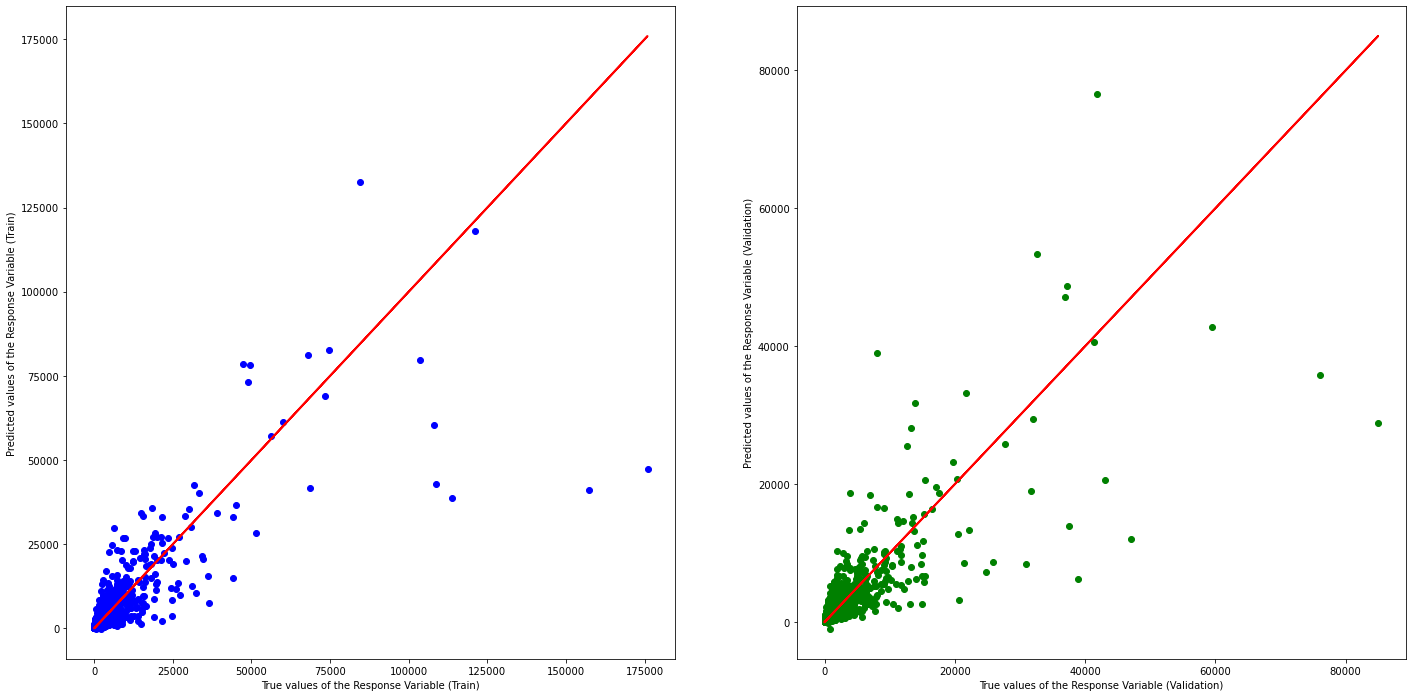

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6708228070063822
Mean Squared Error (MSE) 	: 31255489.271313805

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.6218604360910109
Mean Squared Error (MSE) 	: 8537985.403898763



In [87]:
#Normal Regression.
predictors = ["uni_prod","trans","photo_quan","freight_value"]

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_validation_pred = linreg.predict(X_validation)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_validation, y_validation_pred, color = "green")
axes[1].plot(y_validation, y_validation, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Validation)")
axes[1].set_ylabel("Predicted values of the Response Variable (Validation)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Validation Data)
print("Goodness of Fit of Model \tValidation Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_validation, y_validation))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_validation, y_validation_pred))
print()

Upon looking at the results, we realised that linear regression is not adequete in predicting the sales price we need to explore other models to see if we can get a better model from other algorithm.

Text(0.5, 1.0, 'Residual plot')

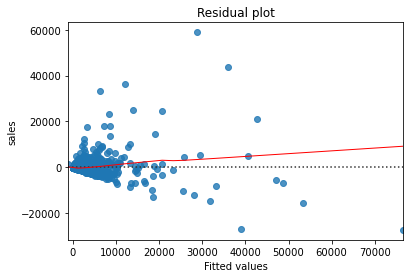

In [88]:
# Residual Vs FittedValue plot to evaluate linear regression model
sb.residplot(x=y_validation_pred, y=y_validation-y_validation_pred, lowess=True, line_kws
             ={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

##  Predicting Using Random Forest Regession

We have chosen random forest because we were intrigued by the idea of it and wanted to try it in our project.


<ipython-input-89-016b47e6858b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


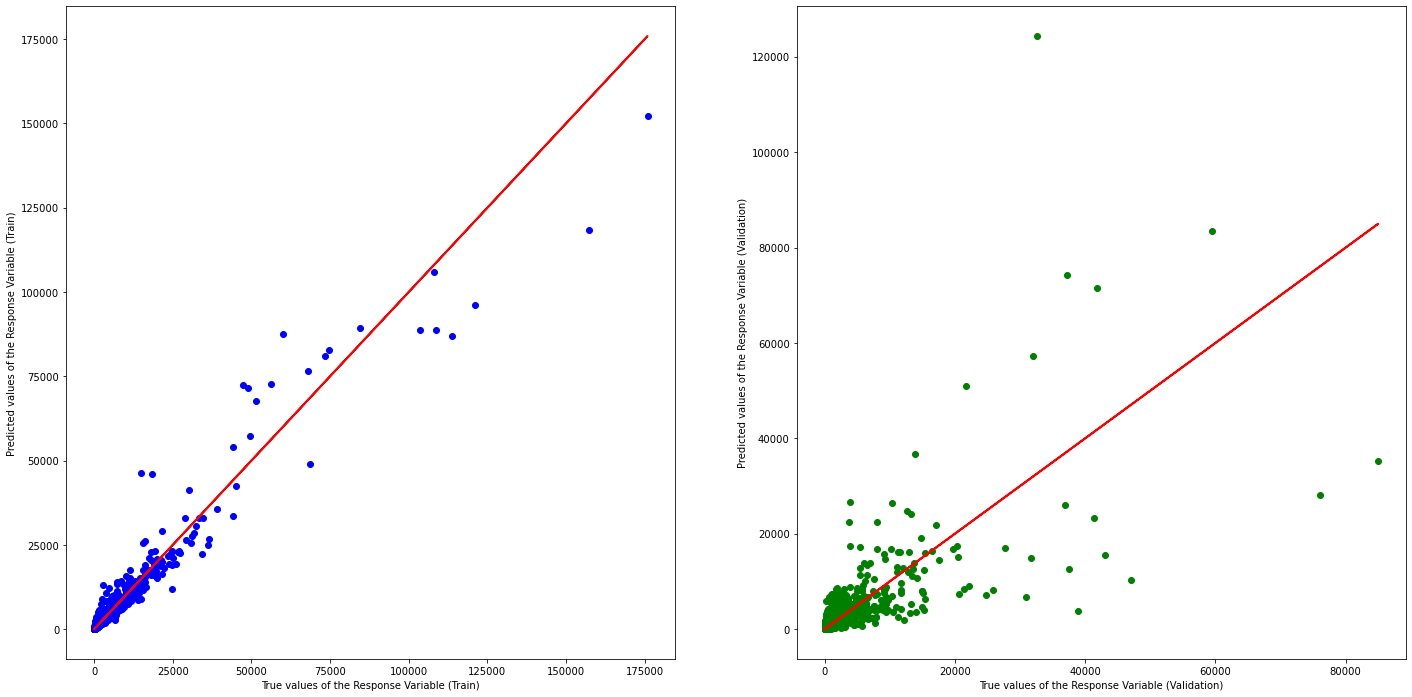

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9403618439582035
Mean Squared Error (MSE) 	: 5662663.714255098

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.3540679369060129
Mean Squared Error (MSE) 	: 14584452.548673328



In [89]:
# Random Forest Regressor Train with 10 trees
#as you guys can see, normal regression have higher explain variance. if i were to increase the number of trees, 
#it will cause over fitting to the train set
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_t_pred = regressor.predict(X_train)
y_v_pred = regressor.predict(X_validation)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_t_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_validation, y_v_pred, color = "green")
axes[1].plot(y_validation, y_validation, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Validation)")
axes[1].set_ylabel("Predicted values of the Response Variable (Validation)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_t_pred))
print()

# Check the Goodness of Fit (on Validation Data)
print("Goodness of Fit of Model \tValidation Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_validation, y_validation))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_validation, y_v_pred))
print()


Random Forest Regression seem to be overfitting itself with 10 trees maybe reducing the number of trees would reduce overfitting and produce a better model.

In [90]:
# Random Forest Regressor Train with 100 trees
# overfitting train data and its a better model compare to 10 trees. R^2 is increased from 0.35 to 0.5

for i in range(2,9):
    print("Test if 'n_estimator' is", i,"\n")
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
    regressor.fit(X_train, y_train['sales'])
    y_t_pred = regressor.predict(X_train)
    y_v_pred = regressor.predict(X_validation)


    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_t_pred))
    print()

    # Check the Goodness of Fit (on Validation Data)
    print("Goodness of Fit of Model \tValidation Dataset")
    print("Explained Variance (R^2) \t:", regressor.score(X_validation, y_validation))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_validation, y_v_pred))
    print("\n\n")


Test if 'n_estimator' is 2 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8843786102166418
Mean Squared Error (MSE) 	: 10978291.28149291

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.31566640410433655
Mean Squared Error (MSE) 	: 15451517.933629883



Test if 'n_estimator' is 3 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8966723007522805
Mean Squared Error (MSE) 	: 9811001.07785794

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.3795181039073965
Mean Squared Error (MSE) 	: 14009815.099636396



Test if 'n_estimator' is 4 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9108433582571636
Mean Squared Error (MSE) 	: 8465454.225784164

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.3960192161704579
Mean Squared Error (MSE) 	: 13637237.699393714



Test if 'n_estimator' is 5 

Goodness of Fit of Model 	Train Dataset
Explained Varian

It seems that when the estimator is set to 4, it best predicts the data but it is doing worse than linear regression, we need to look for another algorithm.

## Predicting Through Linear Regression After Log-ing all variables

### Preparing the Prepaing the Data

In [91]:
#log train and validation data set
X_log_train= X_train.replace(0, np.nan)
X_log_train= np.log10(X_log_train)
X_log_train= X_log_train.fillna(0)

X_log_validation= X_validation.replace(0, np.nan)
X_log_validation= np.log10(X_log_validation)
X_log_validation= X_log_validation.fillna(0)

y_log_train= y_train.replace(0, np.nan)
y_log_train= np.log10(y_log_train)
y_log_train= y_log_train.fillna(0)

y_log_validation= y_validation.replace(0, np.nan)
y_log_validation= np.log10(y_log_validation)
y_log_validation= y_log_validation.fillna(0)

In [92]:
def RSquare(actual, prediction):
    test=actual-prediction
    test=np.power((test),2)
    test=test.sum()
    V=y_train.mean()
    var=np.power((actual-V[0]),2)
    var=var.sum()
    answer= 1- test/var
    return answer[0]

Intercept of Regression 	: b =  [0.01515852]
Coefficients of Regression 	: a =  [[-0.0605952  -0.60038418  0.12991451  1.5360103 ]]

      Predictors  Coefficients
0       uni_prod     -0.060595
1          trans     -0.600384
2     photo_quan      0.129915
3  freight_value      1.536010



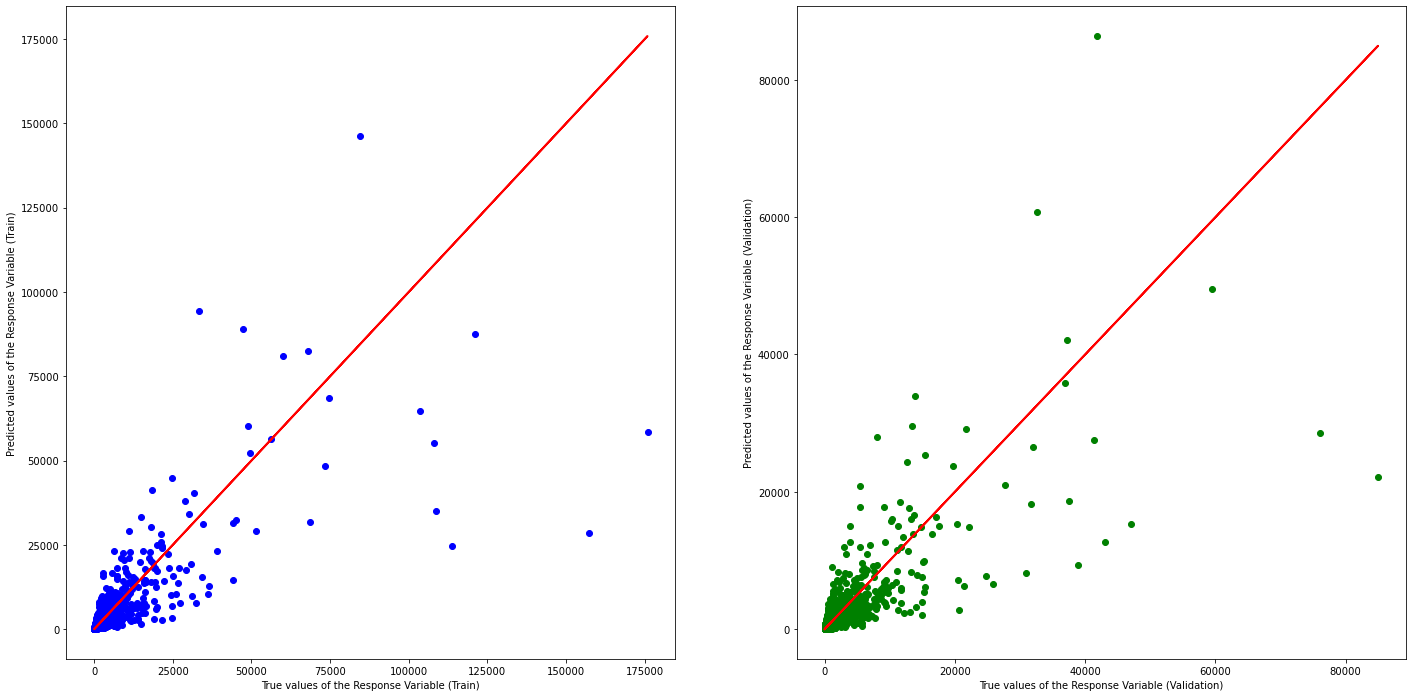

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6089353177417314

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.6058509847179059



In [93]:
predictors = ["uni_prod","trans","photo_quan","freight_value"]

linreg = LinearRegression()
linreg.fit(X_log_train, y_log_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_log_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_log_train_pred = linreg.predict(X_log_train)
y_log_validation_pred = linreg.predict(X_log_validation)
y_log_train_pred=np.power(10,(y_log_train_pred))
y_log_validation_pred=np.power(10,(y_log_validation_pred))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_log_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_validation, y_log_validation_pred, color = "green")
axes[1].plot(y_validation, y_validation, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Validation)")
axes[1].set_ylabel("Predicted values of the Response Variable (Validation)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", RSquare(y_train, y_log_train_pred))
print()

# Check the Goodness of Fit (on Validation Data)
print("Goodness of Fit of Model \tValidation Dataset")
print("Explained Variance (R^2) \t:", RSquare(y_validation, y_log_validation_pred))
print()



Text(0.5, 1.0, 'Residual plot')

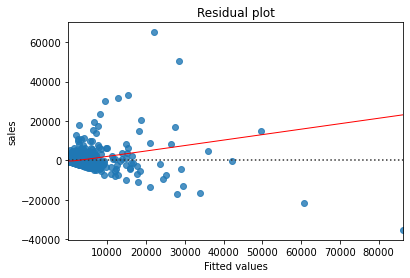

In [94]:
# Residual Vs FittedValue plot to evaluate logged linear regression model
sb.residplot(x=y_log_validation_pred, y=y_validation-y_log_validation_pred, lowess=True, line_kws
             ={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

## Combining Train and Validation Data to predict Test sales

In [95]:
train_val_ord = merged_ord[pd.to_datetime(merged_ord['order_purchase_timestamp'])<=pd.to_datetime("2018-05-31")]
train_val_ord = train_val_ord[train_val_ord.seller_id.isin(new_seller_info['seller_id'])]
train_val_ord

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96462,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27 00:00:00
96463,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00
96465,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
96467,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00


### Sales for final Train (last 3 Months)

In [96]:
train_val_sales = train_val_ord.groupby('seller_id')['price'].sum().reset_index()
train_val_sales.rename(columns = {'price': 'train_val_sales'}, inplace = True)
train_val_sales = pd.DataFrame(new_seller_info['seller_id']).merge(train_val_sales,how='left', left_on='seller_id', right_on='seller_id')
train_val_sales['train_val_sales'] = train_val_sales['train_val_sales'].fillna(0)
train_val_sales

,seller_id,train_val_sales
0,001cca7ae9ae17fb1caed9dfb1094831,19940.64
1,002100f778ceb8431b7a1020ff7ab48f,1133.10
2,004c9cd9d87a3c30c522c48c4fc07416,17866.03
3,00720abe85ba0859807595bbf045a33b,467.10
4,00ee68308b45bc5e2660cd833c3f81cc,16020.00
...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,836.64
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,1612.80
2117,ffeee66ac5d5a62fe688b9d26f83f534,1839.86
2118,fffd5413c0700ac820c7069d66d98c89,7113.60


In [97]:
sales_final = pd.DataFrame(train_val_sales).merge(last3month_sales,how='left', left_on='seller_id', right_on='seller_id')
sales_final['test_sales'] = sales_final['test_sales'].fillna(0)
sales_final.head()

,seller_id,train_val_sales,test_sales
0,001cca7ae9ae17fb1caed9dfb1094831,19940.64,370.9
1,002100f778ceb8431b7a1020ff7ab48f,1133.10,0.0
2,004c9cd9d87a3c30c522c48c4fc07416,17866.03,0.0
3,00720abe85ba0859807595bbf045a33b,467.10,224.8
4,00ee68308b45bc5e2660cd833c3f81cc,16020.00,265.0


### Transaction of seller for Final Train (last 3 Months)

In [98]:
train_val_trans = train_val_ord.groupby('seller_id')['order_id'].count()
train_val_trans.name = 'train_val_trans'
train_val_trans = pd.DataFrame(new_seller_info['seller_id']).merge(train_val_trans,how='left', left_on='seller_id', right_on='seller_id')
train_val_trans['train_val_trans'] = train_val_trans['train_val_trans'].fillna(0)
train_val_trans.head()

,seller_id,train_val_trans
0,001cca7ae9ae17fb1caed9dfb1094831,191.0
1,002100f778ceb8431b7a1020ff7ab48f,49.0
2,004c9cd9d87a3c30c522c48c4fc07416,155.0
3,00720abe85ba0859807595bbf045a33b,10.0
4,00ee68308b45bc5e2660cd833c3f81cc,129.0


In [99]:
trans_final = pd.DataFrame(train_val_trans).merge(last3month_trans,how='left', left_on='seller_id', right_on='seller_id')
trans_final['test_trans'] = trans_final['test_trans'].fillna(0)
trans_final.head()

,seller_id,train_val_trans,test_trans
0,001cca7ae9ae17fb1caed9dfb1094831,191.0,3.0
1,002100f778ceb8431b7a1020ff7ab48f,49.0,0.0
2,004c9cd9d87a3c30c522c48c4fc07416,155.0,0.0
3,00720abe85ba0859807595bbf045a33b,10.0,3.0
4,00ee68308b45bc5e2660cd833c3f81cc,129.0,4.0


### Unique Product sold by a seller for Final Train (last 3 Months)

In [100]:
train_val_uni_prod = train_val_ord.groupby('seller_id')['product_id'].nunique()
train_val_uni_prod.name = 'train_val_prod'
train_val_uni_prod = pd.DataFrame(new_seller_info['seller_id']).merge(train_val_uni_prod,how='left', left_on='seller_id', right_on='seller_id')
train_val_uni_prod['train_val_prod'] = train_val_uni_prod['train_val_prod'].fillna(0)
train_val_uni_prod.head()

,seller_id,train_val_prod
0,001cca7ae9ae17fb1caed9dfb1094831,10.0
1,002100f778ceb8431b7a1020ff7ab48f,23.0
2,004c9cd9d87a3c30c522c48c4fc07416,84.0
3,00720abe85ba0859807595bbf045a33b,7.0
4,00ee68308b45bc5e2660cd833c3f81cc,22.0


In [101]:
uni_prod_final = pd.DataFrame(train_val_uni_prod).merge(last3month_uni_prod,how='left', left_on='seller_id', right_on='seller_id')
uni_prod_final['test_uni_prod'] = uni_prod_final['test_uni_prod'].fillna(0)
uni_prod_final.head()

,seller_id,train_val_prod,test_uni_prod
0,001cca7ae9ae17fb1caed9dfb1094831,10.0,3.0
1,002100f778ceb8431b7a1020ff7ab48f,23.0,0.0
2,004c9cd9d87a3c30c522c48c4fc07416,84.0,0.0
3,00720abe85ba0859807595bbf045a33b,7.0,3.0
4,00ee68308b45bc5e2660cd833c3f81cc,22.0,3.0


### Total Photos by a seller for Final Train (last 3 Months)

In [102]:
photos = inventory[['product_id', 'product_photos_qty']]

def photo_func(product_id):
    photos = inventory[['product_id', 'product_photos_qty']]
    return photos[photos['product_id']==product_id]['product_photos_qty'].iloc[0]

In [103]:
#this portion is to merge with the 3 months photos dataset to get the number of photos the seller post within the 3 months
temp_df = train_val_ord.copy()
temp_df = temp_df.apply(lambda row: photo_func(row['product_id']), axis=1)
temp_df.head()

0    4.0
1    2.0
2    2.0
4    1.0
5    1.0
dtype: float64

In [104]:
train_val_photos_quan = train_val_ord.merge(pd.DataFrame(pd.DataFrame(temp_df, columns = ['train_val_photo_quan'])), on=temp_df.index)[['seller_id','product_id', 'train_val_photo_quan']]
train_val_photos_quan = train_val_photos_quan.drop_duplicates(subset = ['product_id'])
train_val_photos_quan = train_val_photos_quan.groupby('seller_id')['train_val_photo_quan'].sum()
train_val_photos_quan = pd.DataFrame(new_seller_info['seller_id']).merge(train_val_photos_quan,how='left', left_on='seller_id', right_on='seller_id')
train_val_photos_quan['train_val_photo_quan'] = train_val_photos_quan['train_val_photo_quan'].fillna(0)
train_val_photos_quan.head()

,seller_id,train_val_photo_quan
0,001cca7ae9ae17fb1caed9dfb1094831,19.0
1,002100f778ceb8431b7a1020ff7ab48f,23.0
2,004c9cd9d87a3c30c522c48c4fc07416,79.0
3,00720abe85ba0859807595bbf045a33b,17.0
4,00ee68308b45bc5e2660cd833c3f81cc,24.0


In [105]:
photos_final = pd.DataFrame(train_val_photos_quan).merge(last3month_photos_quan,how='left', left_on='seller_id', right_on='seller_id')
photos_final['test_photo_quan'] = photos_final['test_photo_quan'].fillna(0)
photos_final.head()

,seller_id,train_val_photo_quan,test_photo_quan
0,001cca7ae9ae17fb1caed9dfb1094831,19.0,8.0
1,002100f778ceb8431b7a1020ff7ab48f,23.0,0.0
2,004c9cd9d87a3c30c522c48c4fc07416,79.0,0.0
3,00720abe85ba0859807595bbf045a33b,17.0,6.0
4,00ee68308b45bc5e2660cd833c3f81cc,24.0,3.0


### Frieght Value for Final Train (last 3 months)

In [106]:
train_val_freight_value = train_val_ord.groupby('seller_id')['freight_value'].sum()
train_val_freight_value.name = 'train_val_freight_value'
train_val_freight_value = pd.DataFrame(new_seller_info['seller_id']).merge(train_val_freight_value,how='left', left_on='seller_id', right_on='seller_id')
train_val_freight_value['train_val_freight_value'] = train_val_freight_value['train_val_freight_value'].fillna(0)
train_val_freight_value.head()

,seller_id,train_val_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,7136.27
1,002100f778ceb8431b7a1020ff7ab48f,719.75
2,004c9cd9d87a3c30c522c48c4fc07416,3277.10
3,00720abe85ba0859807595bbf045a33b,143.74
4,00ee68308b45bc5e2660cd833c3f81cc,2564.52


In [107]:
freight_value_final = pd.DataFrame(train_val_freight_value).merge(last3month_freight_value,how='left', left_on='seller_id', right_on='seller_id')
freight_value_final['test_freight_value'] = freight_value_final['test_freight_value'].fillna(0)
freight_value_final.head()

,seller_id,train_val_freight_value,test_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,7136.27,131.13
1,002100f778ceb8431b7a1020ff7ab48f,719.75,0.00
2,004c9cd9d87a3c30c522c48c4fc07416,3277.10,0.00
3,00720abe85ba0859807595bbf045a33b,143.74,38.60
4,00ee68308b45bc5e2660cd833c3f81cc,2564.52,49.51


## Forming the Final Train_Test Dataset

In [108]:
test_train_final = sales_final[['seller_id', 'train_val_sales', 'test_sales']].merge(uni_prod_final[['seller_id', 'train_val_prod', 'test_uni_prod']], on='seller_id')
test_train_final = test_train_final.merge(trans_final[['seller_id', 'train_val_trans', 'test_trans']], on='seller_id')
test_train_final = test_train_final.merge(photos_final[['seller_id', 'train_val_photo_quan', 'test_photo_quan']], on='seller_id')
test_train_final = test_train_final.merge(freight_value_final[['seller_id', 'train_val_freight_value', 'test_freight_value']], on='seller_id')
test_train_final

,seller_id,train_val_sales,test_sales,train_val_prod,test_uni_prod,train_val_trans,test_trans,train_val_photo_quan,test_photo_quan,train_val_freight_value,test_freight_value
0,001cca7ae9ae17fb1caed9dfb1094831,19940.64,370.90,10.0,3.0,191.0,3.0,19.0,8.0,7136.27,131.13
1,002100f778ceb8431b7a1020ff7ab48f,1133.10,0.00,23.0,0.0,49.0,0.0,23.0,0.0,719.75,0.00
2,004c9cd9d87a3c30c522c48c4fc07416,17866.03,0.00,84.0,0.0,155.0,0.0,79.0,0.0,3277.10,0.00
3,00720abe85ba0859807595bbf045a33b,467.10,224.80,7.0,3.0,10.0,3.0,17.0,6.0,143.74,38.60
4,00ee68308b45bc5e2660cd833c3f81cc,16020.00,265.00,22.0,3.0,129.0,4.0,24.0,3.0,2564.52,49.51
...,...,...,...,...,...,...,...,...,...,...,...
2115,ffc470761de7d0232558ba5e786e57b7,836.64,490.08,11.0,5.0,16.0,11.0,16.0,10.0,215.10,158.26
2116,ffdd9f82b9a447f6f8d4b91554cc7dd3,1612.80,210.80,9.0,4.0,14.0,4.0,12.0,3.0,550.03,65.60
2117,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,0.00,3.0,0.0,14.0,0.0,14.0,0.0,419.69,0.00
2118,fffd5413c0700ac820c7069d66d98c89,7113.60,1019.70,25.0,7.0,46.0,8.0,63.0,22.0,2086.20,360.01


In [109]:
X_final_train = test_train_final[["train_val_prod",'train_val_trans','train_val_photo_quan','train_val_freight_value']].rename(columns={"train_val_prod":'uni_prod','train_trans':'trans','train_photo_quan':'photo_quan','train_freight_value':'freight_value'})
X_final_test = test_train_final[["test_uni_prod",'test_trans','test_photo_quan','test_freight_value']].rename(columns={"test_uni_prod":'uni_prod','test_trans':'trans','test_photo_quan':'photo_quan','test_freight_value':'freight_value'})

y_final_train = test_train_final[["train_val_sales"]].rename(columns={"train_val_sales":'sales'})
y_final_test = test_train_final[["test_sales"]].rename(columns={"test_sales":'sales'})

## Predicting Test using Random Forest

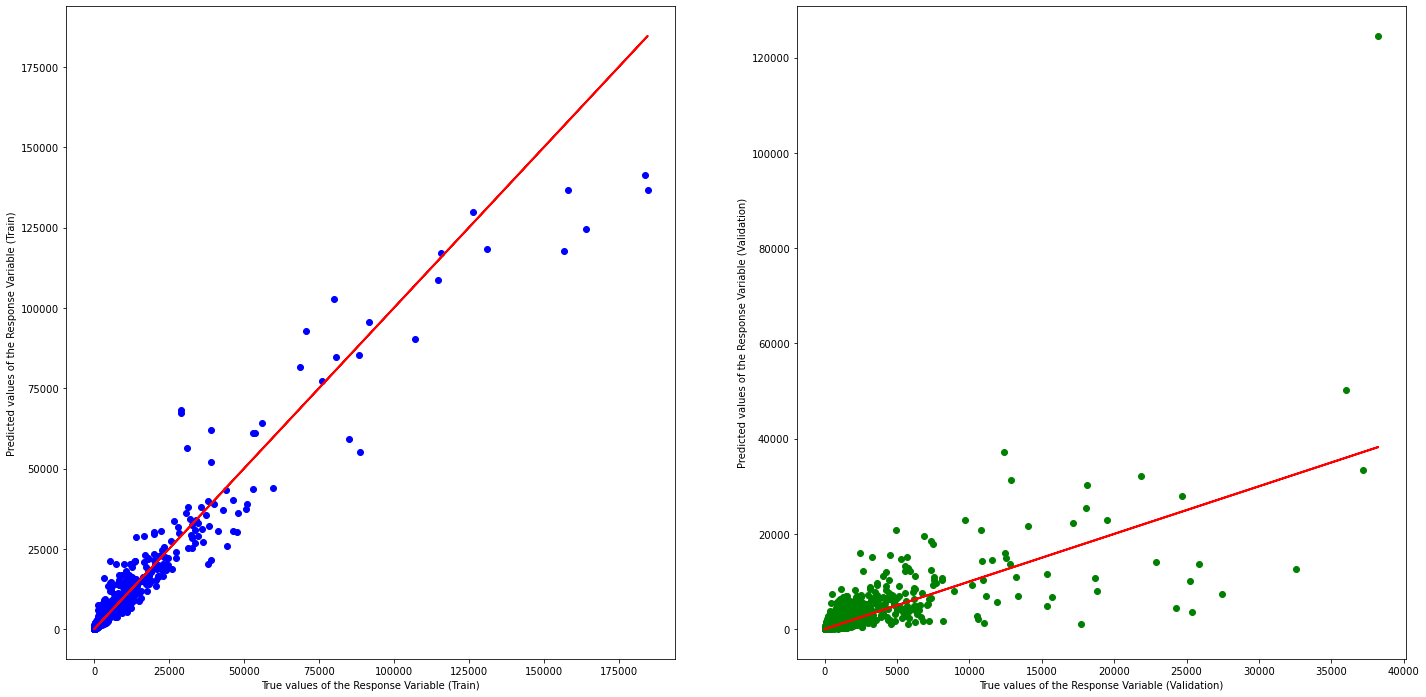

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9343142035690442
Mean Squared Error (MSE) 	: 11055797.400528256

Goodness of Fit of Model 	Validation Dataset
Explained Variance (R^2) 	: 0.07708684310884661
Mean Squared Error (MSE) 	: 7870050.957544487



In [110]:
# Random Forest Regressor Train with 10 trees
#as you guys can see, normal regression have higher explain variance. if i were to increase the number of trees, 
#it will cause over fitting to the train set
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_final_train, y_final_train['sales'])
y_train_pred = regressor.predict(X_final_train)
y_test_pred = regressor.predict(X_final_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_final_train, y_train_pred, color = "blue")
axes[0].plot(y_final_train, y_final_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_final_test, y_test_pred, color = "green")
axes[1].plot(y_final_test, y_final_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Validation)")
axes[1].set_ylabel("Predicted values of the Response Variable (Validation)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_final_train, y_final_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_final_train, y_train_pred))
print()

# Check the Goodness of Fit (on Validation Data)
print("Goodness of Fit of Model \tValidation Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_final_test, y_final_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_final_test, y_test_pred))
print()

Intercept of Regression 	: b =  [261.14338355]
Coefficients of Regression 	: a =  [[126.58202582  -9.67671734 -27.20545119   5.27298578]]

                Predictors  Coefficients
0                 uni_prod    126.582026
1          train_val_trans     -9.676717
2     train_val_photo_quan    -27.205451
3  train_val_freight_value      5.272986



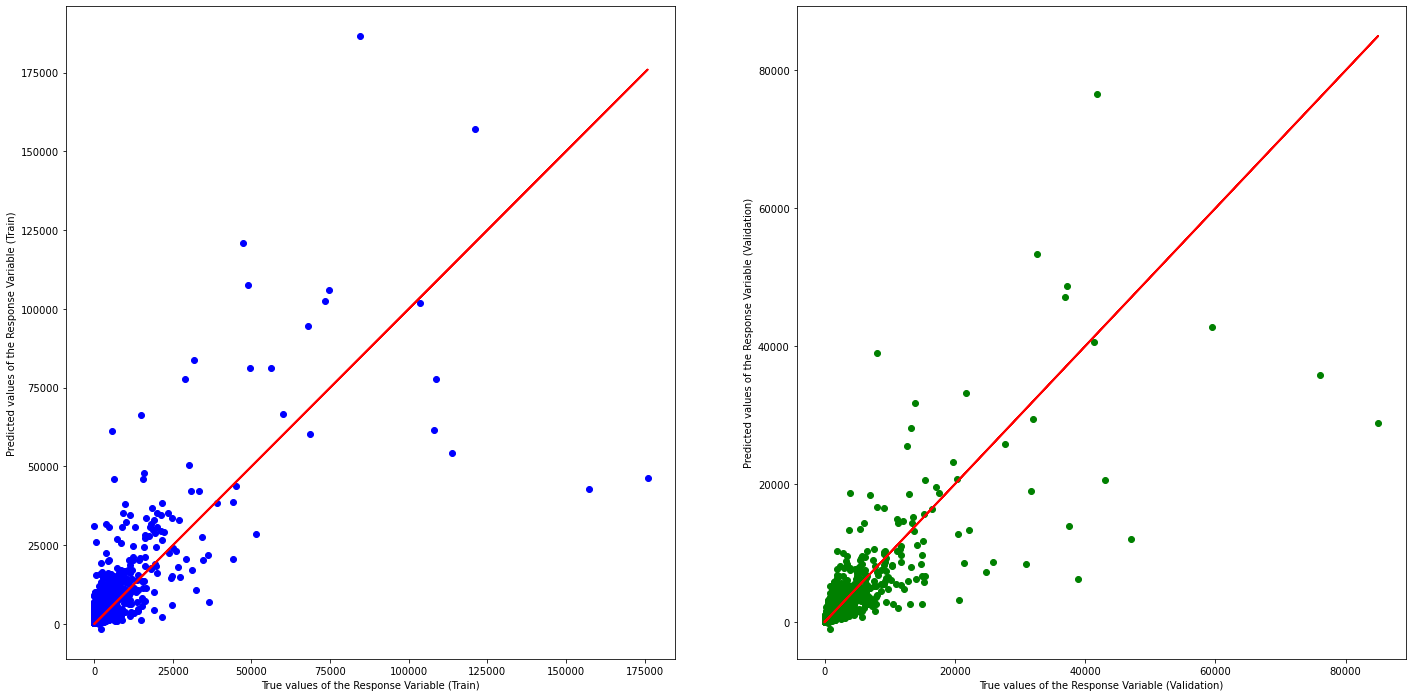

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6872885450590371
Mean Squared Error (MSE) 	: 52633517.114856645

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6211432797232312
Mean Squared Error (MSE) 	: 3230663.331564136



In [111]:
#Normal Regression.
predictors = ["uni_prod","trans","photo_quan","freight_value"]

linreg = LinearRegression()
linreg.fit(X_final_train, y_final_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_final_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_final_train)
y_test_pred = linreg.predict(X_final_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_validation, y_validation_pred, color = "green")
axes[1].plot(y_validation, y_validation, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Validation)")
axes[1].set_ylabel("Predicted values of the Response Variable (Validation)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_final_train, y_final_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_final_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_final_test, y_final_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_final_test, y_test_pred))
print()
